In [1]:
from futile import YamlIO as Y
from futile.Utils import ensure_dir, write
from BigDFT import Calculators as C
from BigDFT import Logfiles as lf
from BigDFT import Inputfiles as I,InputActions as A

import constants as const
import plotting_wrappers
import excited_states
import utilities as utils

import shutil
import os
import numpy as np
import pandas as pd
from IPython.display import display
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
Ha2eV = 27.211386245988

In [ ]:
FF_geopt_mols = pkl.load(open("the_data_FFopt_py2.pkl",'rb'))

In [4]:
og_wd = os.getcwd()
og_wd

'/workspace/kt4218/PhD_final'

In [5]:
data_1 = {}
metal_data = {}
os.chdir(og_wd)
os.chdir(og_wd+'/FF_geopt_files')
print(os.getcwd())
for name, mol_names in FF_geopt_mols.items():
    data_1[name] = []
    metal_data[name] = []
    for file in os.listdir('.'):
        if 'log-' in file:
            if not 'metal' in file:
                if name in file:
#                     print(file)
                    syba_sc = float(file[(5+len(name)):-9])
                    data_1[name].append([syba_sc,file])
            else:
                if name in file:
#                     print file.replace('log-metal_','').replace('_PBE.yaml','')[len(name)+1:]
                    syba_sc = float(file.replace('log-metal_','').replace('_PBE.yaml','')[len(name)+1:])
                    metal_data[name].append([syba_sc,file])
os.chdir(og_wd)

/workspace/kt4218/PhD_final/FF_geopt_files


In [6]:
metal_data

{u'GOBVUP': [],
 u'PXZ-TRZ': [],
 u'TUFWAS': [],
 u'TXO-PhCz': [],
 u'TXO-TPA': [[-67.23389829121412,
   'log-metal_TXO-TPA_-67.23389829121412_PBE.yaml'],
  [23.792576700420437, 'log-metal_TXO-TPA_23.792576700420437_PBE.yaml'],
  [-66.38050604537952, 'log-metal_TXO-TPA_-66.38050604537952_PBE.yaml'],
  [-88.33491013694265, 'log-metal_TXO-TPA_-88.33491013694265_PBE.yaml'],
  [-8.641071184652263, 'log-metal_TXO-TPA_-8.641071184652263_PBE.yaml'],
  [23.34357223850288, 'log-metal_TXO-TPA_23.34357223850288_PBE.yaml'],
  [66.05278341561268, 'log-metal_TXO-TPA_66.05278341561268_PBE.yaml'],
  [3.8663128104222384, 'log-metal_TXO-TPA_3.8663128104222384_PBE.yaml'],
  [13.489458254329758, 'log-metal_TXO-TPA_13.489458254329758_PBE.yaml'],
  [-28.995296405459065, 'log-metal_TXO-TPA_-28.995296405459065_PBE.yaml'],
  [-21.488159172655262, 'log-metal_TXO-TPA_-21.488159172655262_PBE.yaml'],
  [15.702673638230614, 'log-metal_TXO-TPA_15.702673638230614_PBE.yaml'],
  [-26.591188503848002, 'log-metal_TXO-TPA

In [7]:
count=0
for name in FF_geopt_mols.keys():
    print(len(data_1[name]), name)
    count = len(data_1[name])+count
    
print(count,'total')

(61, u'TXO-TPA')
(70, u'TUFWAS')
(693, u'TXO-PhCz')
(1147, u'YAFNOI')
(34, u'PXZ-TRZ')
(105, u'GOBVUP')
(2110, 'total')


In [8]:
log_dir = '/home/kt4218/workspace/PhD_final/FF_geopt_files/'

In [9]:
data_2 = {}
data_2['Name'] = []
data_2['log file'] = []
data_2['HOMO'] = []
data_2['LUMO'] = []
data_2['LUMO-HOMO'] = []
data_2['SYBA Score'] = []
data_2['Force'] = []
data_2['Total Energy per atom (eV/atom)'] = []
for name,files in data_1.items():
    
    for file in files:
        log = lf.Logfile(log_dir+file[1])
        
        final_gnrm = log.log['Ground State Optimization'][-1]['Hamiltonian Optimization'][-1]\
            ['Subspace Optimization']['Wavefunctions Iterations'][-1]['gnrm']
        target_gnrm = log.log['dft']['gnrm_cv']
        if final_gnrm > float(target_gnrm):
            
            data_2['Name'].append(name)
            data_2['log file'].append(file[1])
            
            
            #converged = False
            print file, 'WARNING, calculation did not converge'
            data_2['HOMO'].append(float('nan'))
            data_2['LUMO'].append(float('nan'))
            data_2['LUMO-HOMO'].append(float('nan'))
            data_2['SYBA Score'].append(float(file[1][(5+len(name)):-9]))
            data_2['Force'].append(float('nan'))
            data_2['Total Energy per atom (eV/atom)'].append(float('nan'))
        else:

            data_2['Name'].append(name)
            data_2['log file'].append(file[1])
            
            tot_electrons = log.log['Total Number of Electrons']
        #     tot_orbs = log.log['Total Number of Orbitals'] # this include virtuals
            tot_orbs = tot_electrons / 2
            homo = log.evals[0][0][tot_orbs-1] * Ha2eV
            lumo = log.evals[0][0][tot_orbs] * Ha2eV
            
            
            data_2['HOMO'].append(homo)
            data_2['LUMO'].append(lumo)
            data_2['LUMO-HOMO'].append(lumo-homo)
            data_2['SYBA Score'].append(float(file[1][(5+len(name)):-9]))
            data_2['Force'].append(log.log['Force Norm (Hartree/Bohr)'])
            data_2['Total Energy per atom (eV/atom)'].append((log.energy/log.nat) * Ha2eV)

[-45.25625079558886, 'log-TXO-PhCz_-45.25625079558886_PBE.yaml'] WARNING, calculation did not converge
[26.347952654495646, 'log-TXO-PhCz_26.347952654495646_PBE.yaml'] WARNING, calculation did not converge
[23.392270578983233, 'log-TXO-PhCz_23.392270578983233_PBE.yaml'] WARNING, calculation did not converge
[16.24369320961587, 'log-TXO-PhCz_16.24369320961587_PBE.yaml'] WARNING, calculation did not converge
[25.048827773069707, 'log-TXO-PhCz_25.048827773069707_PBE.yaml'] WARNING, calculation did not converge
[-3.669757513751025, 'log-TXO-PhCz_-3.669757513751025_PBE.yaml'] WARNING, calculation did not converge
[-8.772727930418618, 'log-TXO-PhCz_-8.772727930418618_PBE.yaml'] WARNING, calculation did not converge
[24.811670573609025, 'log-TXO-PhCz_24.811670573609025_PBE.yaml'] WARNING, calculation did not converge
[20.108119100773227, 'log-TXO-PhCz_20.108119100773227_PBE.yaml'] WARNING, calculation did not converge
[30.45766708809294, 'log-TXO-PhCz_30.45766708809294_PBE.yaml'] WARNING, cal

In [10]:
#metals
data_3 = {}
data_3['Name'] = []
data_3['log file'] = []
data_3['HOMO'] = []
data_3['LUMO'] = []
data_3['LUMO-HOMO'] = []
data_3['SYBA Score'] = []
data_3['Force'] = []
data_3['Total Energy per atom (eV/atom)'] = []
for name,files in metal_data.items():
    
    for file in files:
        log = lf.Logfile(log_dir+file[1])
        
        final_gnrm = log.log['Ground State Optimization'][-1]['Hamiltonian Optimization'][-1]\
            ['Subspace Optimization']['Wavefunctions Iterations'][-1]['gnrm']
        target_gnrm = log.log['dft']['gnrm_cv']
        if final_gnrm > float(target_gnrm):
            
            data_3['Name'].append(name)
            data_3['log file'].append(file[1])
            
            #converged = False
            print file, 'WARNING, calculation did not converge'
            data_3['HOMO'].append(float('nan'))
            data_3['LUMO'].append(float('nan'))
            data_3['LUMO-HOMO'].append(float('nan'))
            data_3['SYBA Score'].append(float(file[1].replace('log-metal_','').replace('_PBE.yaml','')[len(name)+1:]))
            data_3['Force'].append(float('nan'))
            data_3['Total Energy per atom (eV/atom)'].append(float('nan'))
        else:

            data_3['Name'].append(name)
            data_3['log file'].append(file[1])
            
            tot_electrons = log.log['Total Number of Electrons']
        #     tot_orbs = log.log['Total Number of Orbitals'] # this include virtuals
            tot_orbs = tot_electrons / 2
            homo = log.evals[0][0][tot_orbs-1] * Ha2eV
            lumo = log.evals[0][0][tot_orbs] * Ha2eV
            
            
            data_3['HOMO'].append(homo)
            data_3['LUMO'].append(lumo)
            data_3['LUMO-HOMO'].append(lumo-homo)
            data_3['SYBA Score'].append(float(file[1].replace('log-metal_','').replace('_PBE.yaml','')[len(name)+1:]))
            data_3['Force'].append(log.log['Force Norm (Hartree/Bohr)'])
            data_3['Total Energy per atom (eV/atom)'].append((log.energy/log.nat) * Ha2eV)

In [11]:
# pickledump

In [12]:
# for score in data_2['SYBA Score']:
#     if score < -100 or score >100:
#         print score

In [13]:
df = pd.DataFrame(data_2)
df.query("LUMO-HOMO > 1 & LUMO-HOMO < 2").sample(10)
# # for name in data_1:                  
# # df.query("Name == 'TXO-TPA'").plot('SYBA Score','LUMO-HOMO',marker='x',linestyle='none')
# df.plot('SYBA Score','LUMO-HOMO',marker='x',linestyle='none')
# plt.show()

Force      HOMO      LUMO  LUMO-HOMO      Name  SYBA Score  \
2059  0.057183 -4.042778 -2.334381   1.708396    GOBVUP  -66.321872   
287   0.050526 -5.308968 -3.412736   1.896231  TXO-PhCz  -14.653483   
1142  0.110687 -3.930994 -2.751929   1.179065    YAFNOI    7.157689   
130   0.095561 -4.261052 -2.955623   1.305428    TUFWAS   12.377495   
257   0.091484 -5.294013 -3.494357   1.799656  TXO-PhCz  -11.185045   
406   0.183031 -5.275371 -3.491398   1.783973  TXO-PhCz  -34.869498   
1983  0.174481 -4.512849 -3.018839   1.494010   PXZ-TRZ  -52.766926   
890   0.191892 -6.492994 -5.366539   1.126454    YAFNOI   -4.627751   
1920  0.082726 -3.571982 -2.048001   1.523981    YAFNOI  -10.021839   
1328  0.212581 -4.838947 -3.227065   1.611882    YAFNOI    1.809103   

      Total Energy per atom (eV/atom)  \
2059                      -187.992974   
287                       -167.252543   
1142                      -122.974386   
130                       -174.758971   
257                       -148.723628   
406                       -148.624462   
1983                      -134.722622   
890                       -110.419138   
1920                      -115.190852   
1328                      -125.439397   

                                       log file  
2059     log-GOBVUP_-66.32187174441562_PBE.yaml  
287    log-TXO-PhCz_-14.65348263363084_PBE.yaml  
1142      log-YAFNOI_7.157688825836223_PBE.yaml  
130      log-TUFWAS_12.377494542091119_PBE.yaml  
257   log-TXO-PhCz_-11.185045464481643_PBE.yaml  
406    log-TXO-PhCz_-34.86949831111183_PBE.yaml  
1983   log-PXZ-TRZ_-52.766925657677874_PBE.yaml  
890      log-YAFNOI_-4.627750806972156_PBE.yaml  
1920    log-YAFNOI_-10.021838565604515_PBE.yaml  
1328     log-YAFNOI_1.8091026976045739_PBE.yaml

In [14]:
df2 = pd.DataFrame(data_3).dropna()
df2

Force      HOMO      LUMO  LUMO-HOMO     Name  SYBA Score  \
0   0.464647 -4.290597 -3.801305   0.489291  TXO-TPA  -67.233898   
1   0.190559 -4.552449 -4.169530   0.382919  TXO-TPA   23.792577   
2   0.577413 -3.830330 -3.169495   0.660836  TXO-TPA  -66.380506   
3   0.482008 -4.405969 -4.208208   0.197761  TXO-TPA  -88.334910   
4   0.076247 -6.415809 -6.241132   0.174677  TXO-TPA   -8.641071   
5   0.132946 -5.370902 -4.914122   0.456780  TXO-TPA   23.343572   
6   0.059918 -4.911498 -3.914259   0.997239  TXO-TPA   66.052783   
7   0.213291 -5.066269 -4.749948   0.316321  TXO-TPA    3.866313   
8   0.080702 -5.966622 -5.785496   0.181126  TXO-TPA   13.489458   
9   0.111390 -4.910016 -4.569603   0.340412  TXO-TPA  -28.995296   
10  0.357665 -6.420413 -5.888340   0.532073  TXO-TPA  -21.488159   
11  0.062416 -6.350510 -5.764159   0.586351  TXO-TPA   15.702674   
12  0.160484 -5.985831 -5.653334   0.332497  TXO-TPA  -26.591189   
13  0.160860 -5.013334 -4.675895   0.337439  TXO-TPA    3.412416   
14  0.339388 -6.821888 -6.451836   0.370051  TXO-TPA  -11.192227   
15  0.377804 -5.894369 -5.150784   0.743585  TXO-TPA   -5.804466   

    Total Energy per atom (eV/atom)  \
0                       -146.071626   
1                       -148.470783   
2                       -136.790590   
3                       -136.941486   
4                       -185.196394   
5                       -166.498579   
6                       -136.392697   
7                       -145.755915   
8                       -190.656614   
9                       -136.968955   
10                      -153.355492   
11                      -193.445839   
12                      -140.991470   
13                      -146.421883   
14                      -185.260357   
15                      -146.959736   

                                          log file  
0    log-metal_TXO-TPA_-67.23389829121412_PBE.yaml  
1    log-metal_TXO-TPA_23.792576700420437_PBE.yaml  
2    log-metal_TXO-TPA_-66.38050604537952_PBE.yaml  
3    log-metal_TXO-TPA_-88.33491013694265_PBE.yaml  
4    log-metal_TXO-TPA_-8.641071184652263_PBE.yaml  
5     log-metal_TXO-TPA_23.34357223850288_PBE.yaml  
6     log-metal_TXO-TPA_66.05278341561268_PBE.yaml  
7    log-metal_TXO-TPA_3.8663128104222384_PBE.yaml  
8    log-metal_TXO-TPA_13.489458254329758_PBE.yaml  
9   log-metal_TXO-TPA_-28.995296405459065_PBE.yaml  
10  log-metal_TXO-TPA_-21.488159172655262_PBE.yaml  
11   log-metal_TXO-TPA_15.702673638230614_PBE.yaml  
12  log-metal_TXO-TPA_-26.591188503848002_PBE.yaml  
13    log-metal_TXO-TPA_3.412416077640528_PBE.yaml  
14  log-metal_TXO-TPA_-11.192227302110215_PBE.yaml  
15  log-metal_TXO-TPA_-5.8044658467732155_PBE.yaml

In [15]:
df3 = df.merge(df2, on=['Name','SYBA Score'], how='inner')
df3.iloc[:,[4,5,0,7,3,10]]

Name  SYBA Score   Force_x                                log file_x  \
0   TXO-TPA   -5.804466  0.377771  log-TXO-TPA_-5.8044658467732155_PBE.yaml   
1   TXO-TPA   15.702674  0.062515   log-TXO-TPA_15.702673638230614_PBE.yaml   
2   TXO-TPA  -66.380506  0.580446   log-TXO-TPA_-66.38050604537952_PBE.yaml   
3   TXO-TPA    3.866313  0.608332   log-TXO-TPA_3.8663128104222384_PBE.yaml   
4   TXO-TPA   -8.641071  0.203984   log-TXO-TPA_-8.641071184652263_PBE.yaml   
5   TXO-TPA    3.412416  0.634939    log-TXO-TPA_3.412416077640528_PBE.yaml   
6   TXO-TPA  -21.488159  0.357624  log-TXO-TPA_-21.488159172655262_PBE.yaml   
7   TXO-TPA  -67.233898  0.468100   log-TXO-TPA_-67.23389829121412_PBE.yaml   
8   TXO-TPA  -28.995296  0.109334  log-TXO-TPA_-28.995296405459065_PBE.yaml   
9   TXO-TPA  -88.334910  0.494301   log-TXO-TPA_-88.33491013694265_PBE.yaml   
10  TXO-TPA   66.052783  0.060473    log-TXO-TPA_66.05278341561268_PBE.yaml   
11  TXO-TPA   13.489458  0.091623   log-TXO-TPA_13.489458254329758_PBE.yaml   
12  TXO-TPA  -26.591189  0.165433  log-TXO-TPA_-26.591188503848002_PBE.yaml   
13  TXO-TPA   23.343572  0.151820    log-TXO-TPA_23.34357223850288_PBE.yaml   
14  TXO-TPA  -11.192227  0.338438  log-TXO-TPA_-11.192227302110215_PBE.yaml   
15  TXO-TPA   23.792577  0.194451   log-TXO-TPA_23.792576700420437_PBE.yaml   

    LUMO-HOMO_x    LUMO_y  
0      0.745339 -5.150784  
1      0.584251 -5.764159  
2      0.731102 -3.169495  
3      0.230832 -4.749948  
4      0.118523 -6.241132  
5      0.079327 -4.675895  
6      0.514629 -5.888340  
7      0.487555 -3.801305  
8      0.129146 -4.569603  
9      0.050926 -4.208208  
10     0.946590 -3.914259  
11     0.064725 -5.785496  
12     0.144005 -5.653334  
13     0.236488 -4.914122  
14     0.224461 -6.451836  
15     0.232808 -4.169530

In [16]:
df3

Force_x    HOMO_x    LUMO_x  LUMO-HOMO_x     Name  SYBA Score  \
0   0.377771 -5.894499 -5.149159     0.745339  TXO-TPA   -5.804466   
1   0.062515 -6.349122 -5.764871     0.584251  TXO-TPA   15.702674   
2   0.580446 -3.823700 -3.092597     0.731102  TXO-TPA  -66.380506   
3   0.608332 -5.116611 -4.885779     0.230832  TXO-TPA    3.866313   
4   0.203984 -6.309669 -6.191146     0.118523  TXO-TPA   -8.641071   
5   0.634939 -4.948189 -4.868862     0.079327  TXO-TPA    3.412416   
6   0.357624 -6.407807 -5.893178     0.514629  TXO-TPA  -21.488159   
7   0.468100 -4.252544 -3.764989     0.487555  TXO-TPA  -67.233898   
8   0.109334 -4.892851 -4.763705     0.129146  TXO-TPA  -28.995296   
9   0.494301 -4.368176 -4.317250     0.050926  TXO-TPA  -88.334910   
10  0.060473 -4.892803 -3.946212     0.946590  TXO-TPA   66.052783   
11  0.091623 -5.891192 -5.826467     0.064725  TXO-TPA   13.489458   
12  0.165433 -5.813431 -5.669426     0.144005  TXO-TPA  -26.591189   
13  0.151820 -5.260934 -5.024446     0.236488  TXO-TPA   23.343572   
14  0.338438 -6.721839 -6.497377     0.224461  TXO-TPA  -11.192227   
15  0.194451 -4.376451 -4.143643     0.232808  TXO-TPA   23.792577   

    Total Energy per atom (eV/atom)_x  \
0                         -146.955347   
1                         -193.436234   
2                         -136.787751   
3                         -145.752589   
4                         -185.165580   
5                         -146.418741   
6                         -153.341500   
7                         -146.068762   
8                         -136.966144   
9                         -136.938107   
10                        -136.392668   
11                        -190.646429   
12                        -140.981105   
13                        -166.493885   
14                        -185.237408   
15                        -148.469147   

                                  log file_x   Force_y    HOMO_y    LUMO_y  \
0   log-TXO-TPA_-5.8044658467732155_PBE.yaml  0.377804 -5.894369 -5.150784   
1    log-TXO-TPA_15.702673638230614_PBE.yaml  0.062416 -6.350510 -5.764159   
2    log-TXO-TPA_-66.38050604537952_PBE.yaml  0.577413 -3.830330 -3.169495   
3    log-TXO-TPA_3.8663128104222384_PBE.yaml  0.213291 -5.066269 -4.749948   
4    log-TXO-TPA_-8.641071184652263_PBE.yaml  0.076247 -6.415809 -6.241132   
5     log-TXO-TPA_3.412416077640528_PBE.yaml  0.160860 -5.013334 -4.675895   
6   log-TXO-TPA_-21.488159172655262_PBE.yaml  0.357665 -6.420413 -5.888340   
7    log-TXO-TPA_-67.23389829121412_PBE.yaml  0.464647 -4.290597 -3.801305   
8   log-TXO-TPA_-28.995296405459065_PBE.yaml  0.111390 -4.910016 -4.569603   
9    log-TXO-TPA_-88.33491013694265_PBE.yaml  0.482008 -4.405969 -4.208208   
10    log-TXO-TPA_66.05278341561268_PBE.yaml  0.059918 -4.911498 -3.914259   
11   log-TXO-TPA_13.489458254329758_PBE.yaml  0.080702 -5.966622 -5.785496   
12  log-TXO-TPA_-26.591188503848002_PBE.yaml  0.160484 -5.985831 -5.653334   
13    log-TXO-TPA_23.34357223850288_PBE.yaml  0.132946 -5.370902 -4.914122   
14  log-TXO-TPA_-11.192227302110215_PBE.yaml  0.339388 -6.821888 -6.451836   
15   log-TXO-TPA_23.792576700420437_PBE.yaml  0.190559 -4.552449 -4.169530   

    LUMO-HOMO_y  Total Energy per atom (eV/atom)_y  \
0      0.743585                        -146.959736   
1      0.586351                        -193.445839   
2      0.660836                        -136.790590   
3      0.316321                        -145.755915   
4      0.174677                        -185.196394   
5      0.337439                        -146.421883   
6      0.532073                        -153.355492   
7      0.489291                        -146.071626   
8      0.340412                        -136.968955   
9      0.197761                        -136.941486   
10     0.997239                        -136.392697   
11     0.181126                        -190.656614   
12     0.332497                        -140.991470   
13     0.456780                  

In [17]:
HL_lt_1_SYBA_score = df.query("LUMO-HOMO < 1")["SYBA Score"].values
HL_mt_1_SYBA_score = df.query("LUMO-HOMO > 1")["SYBA Score"].values

HL_lt_1 = df.query("LUMO-HOMO < 1")["LUMO-HOMO"].values
HL_mt_1 = df.query("LUMO-HOMO > 1")["LUMO-HOMO"].values

# df.query("LUMO-HOMO < 1")["SYBA Score"].values

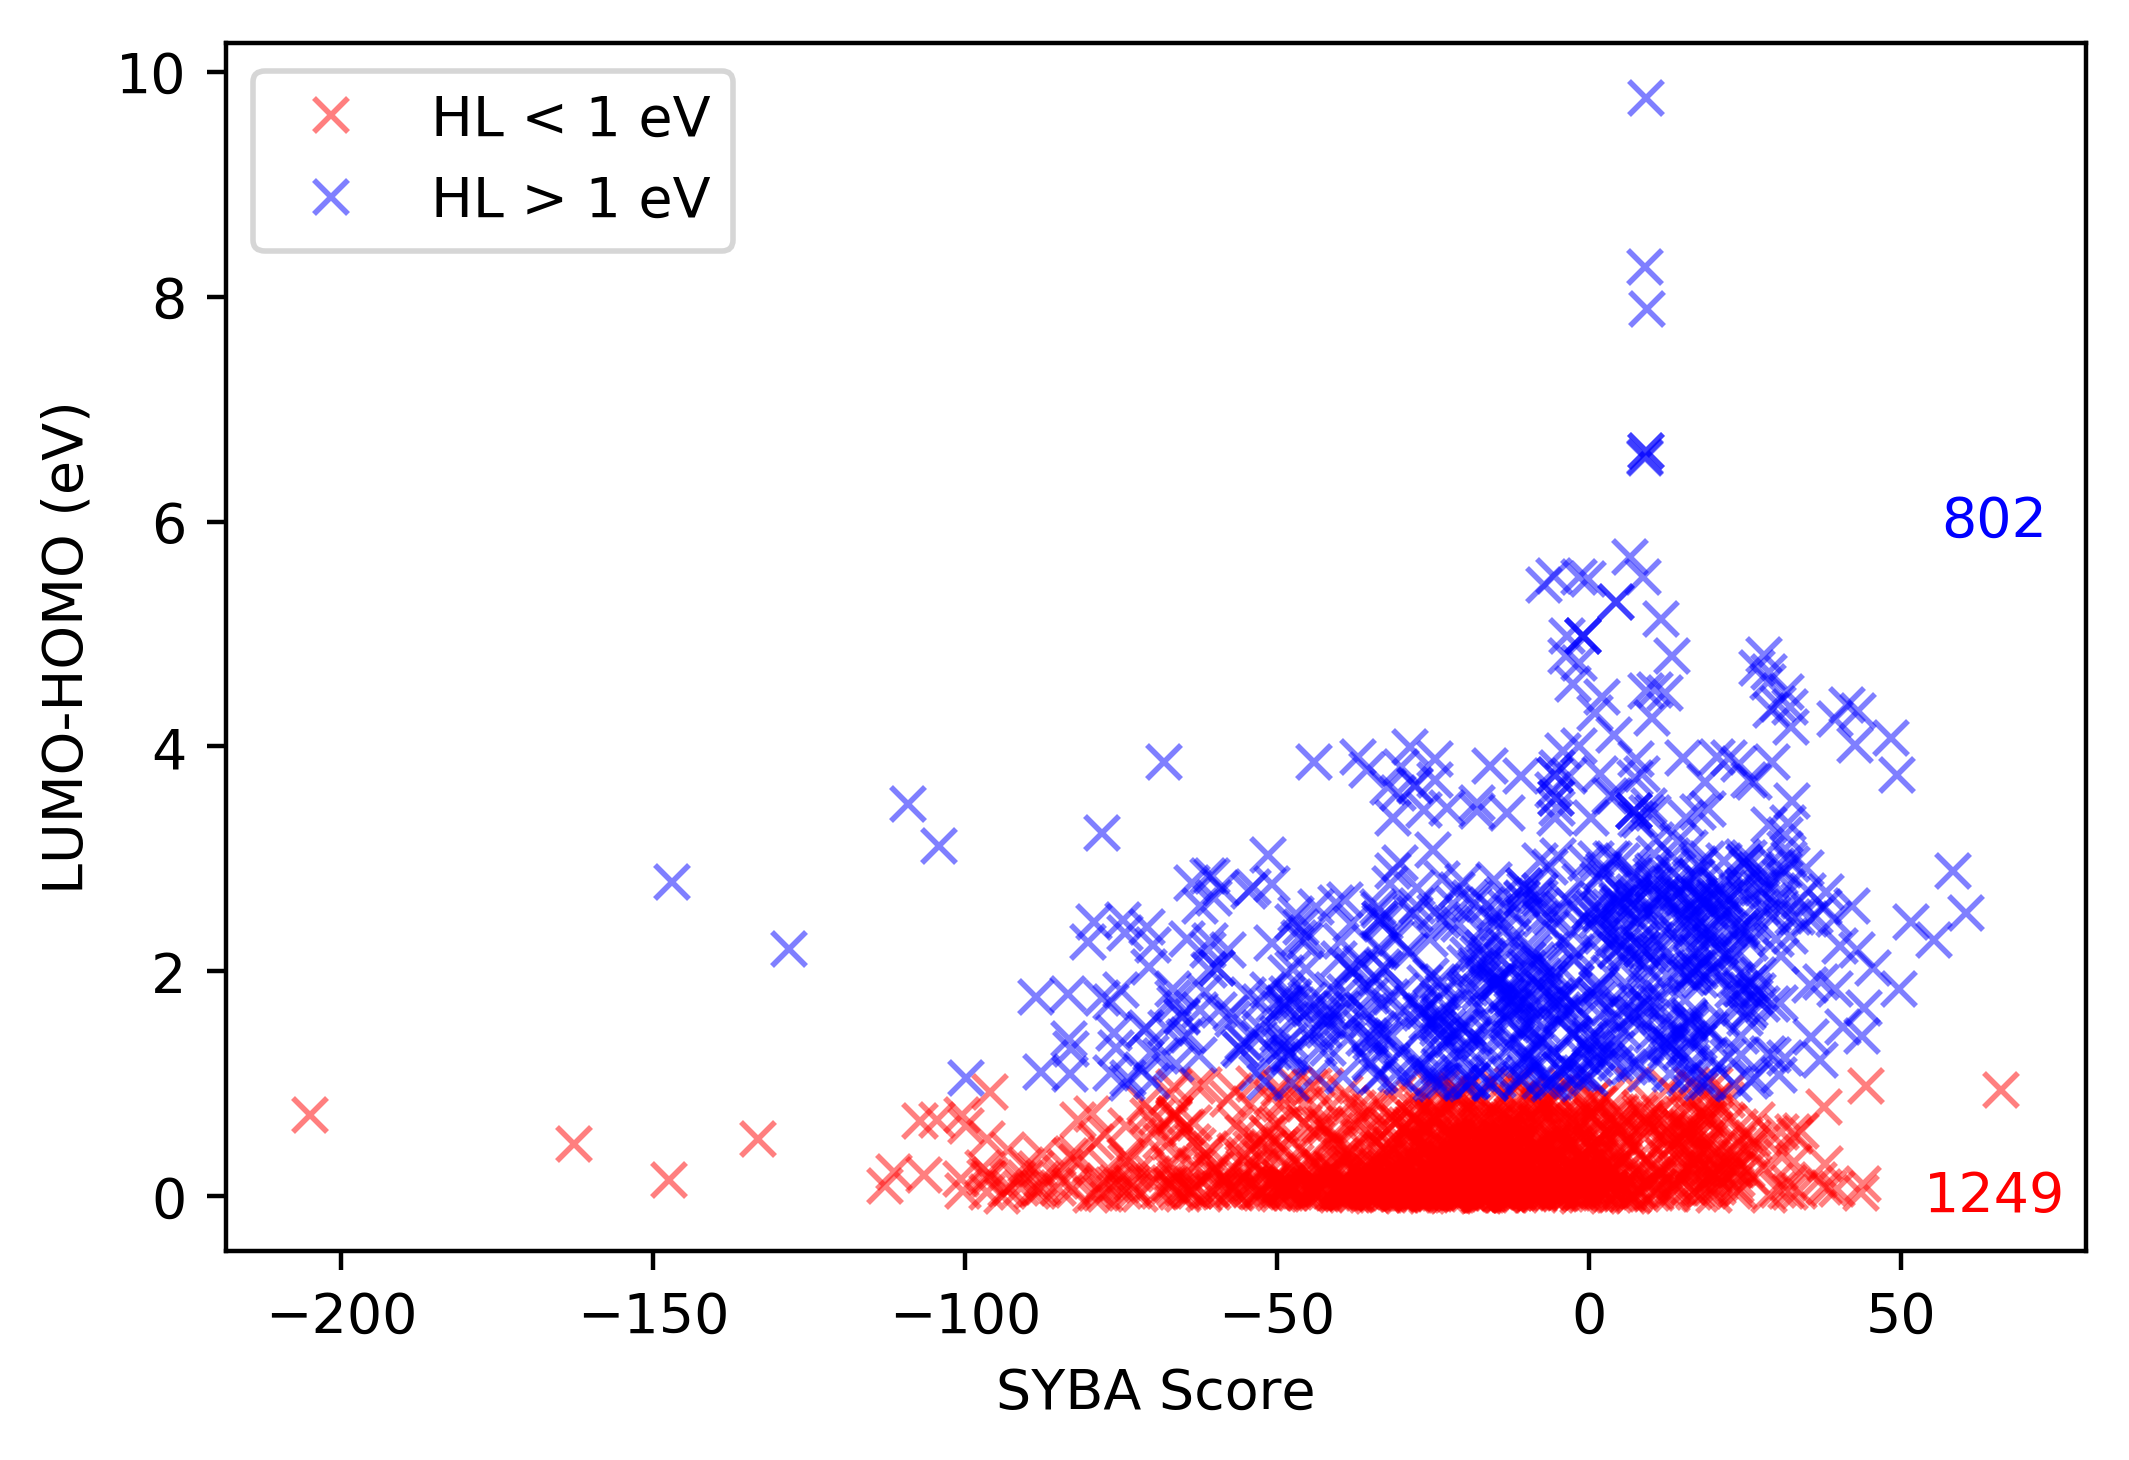

In [18]:
# f=figure(figsize=(8,6),dpi=80)
# f.set_figwidth(4)
# f.set_figheight(3)
plt.plot(HL_lt_1_SYBA_score,HL_lt_1,linestyle='none',marker='x',alpha=0.5,label='HL < 1 eV',color='r')
plt.plot(HL_mt_1_SYBA_score,HL_mt_1,linestyle='none',marker='x',alpha=0.5,label='HL > 1 eV',color='b')
num_HL_lt_1 = len(HL_lt_1)
num_HL_mt_1 = len(HL_mt_1)
plt.text(65,0,num_HL_lt_1,horizontalalignment='center',verticalalignment='center',color='r')
plt.text(65,6,num_HL_mt_1,horizontalalignment='center',verticalalignment='center',color='b')
plt.ylabel('LUMO-HOMO (eV)')
plt.xlabel('SYBA Score')
# plt.xticks(size=10)
# plt.yticks(size=10)
plt.legend()
plt.show()

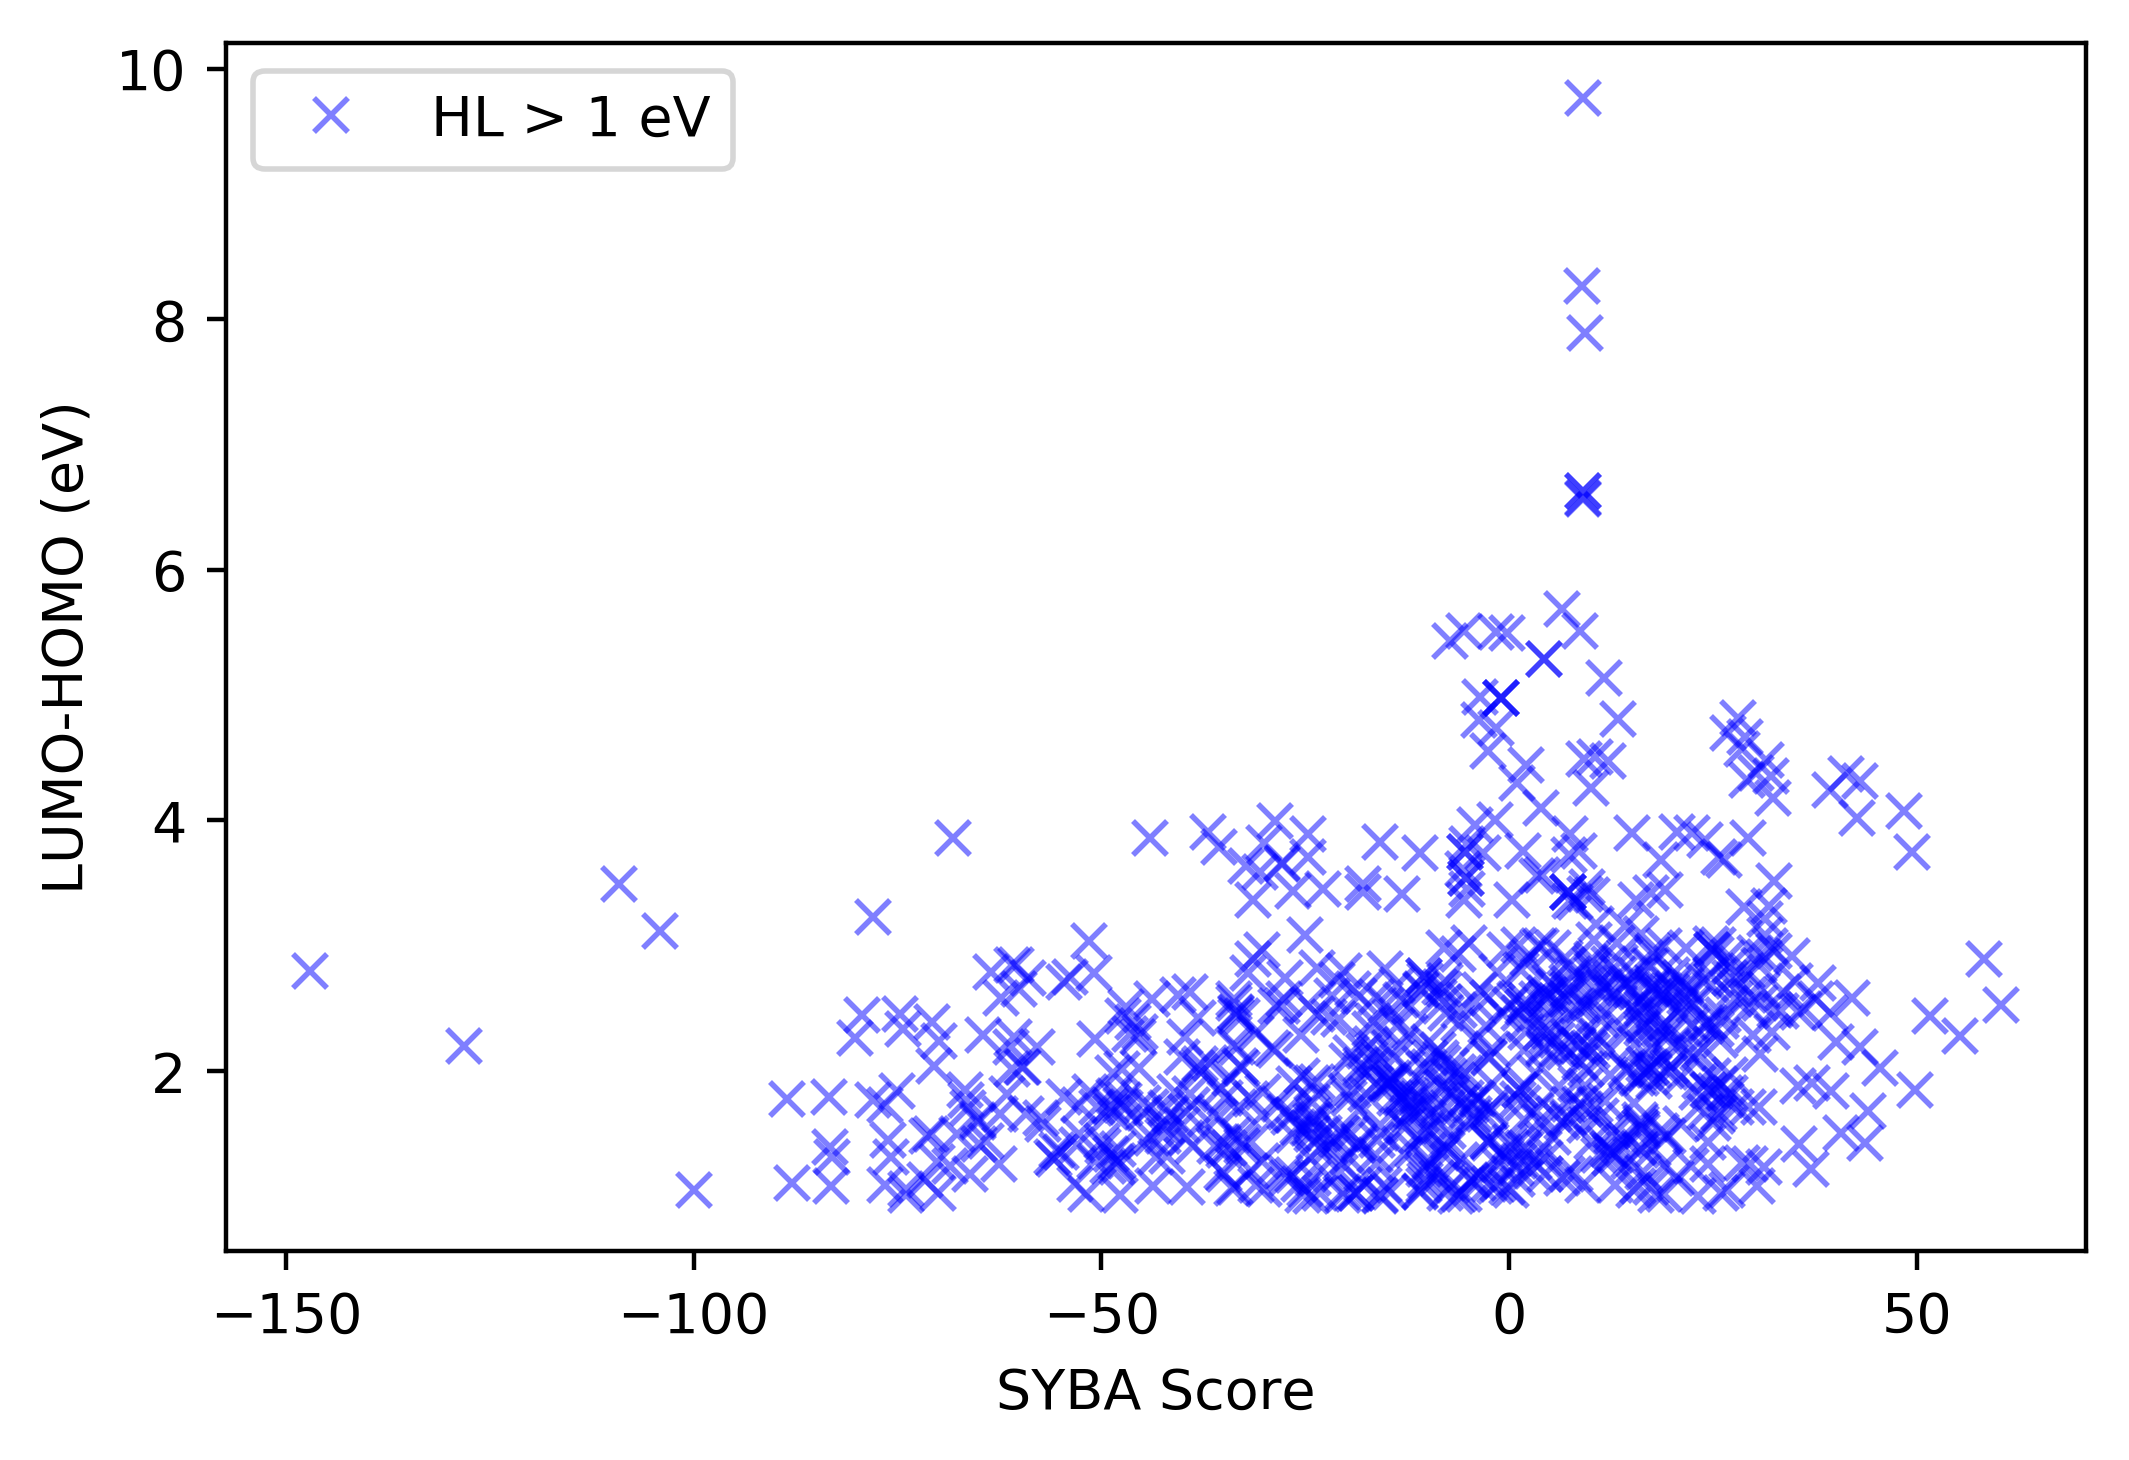

In [19]:
plt.plot(HL_mt_1_SYBA_score,HL_mt_1,linestyle='none',marker='x',alpha=0.5,label='HL > 1 eV',color='b')
plt.legend()
plt.ylabel('LUMO-HOMO (eV)')
plt.xlabel('SYBA Score')
plt.show()

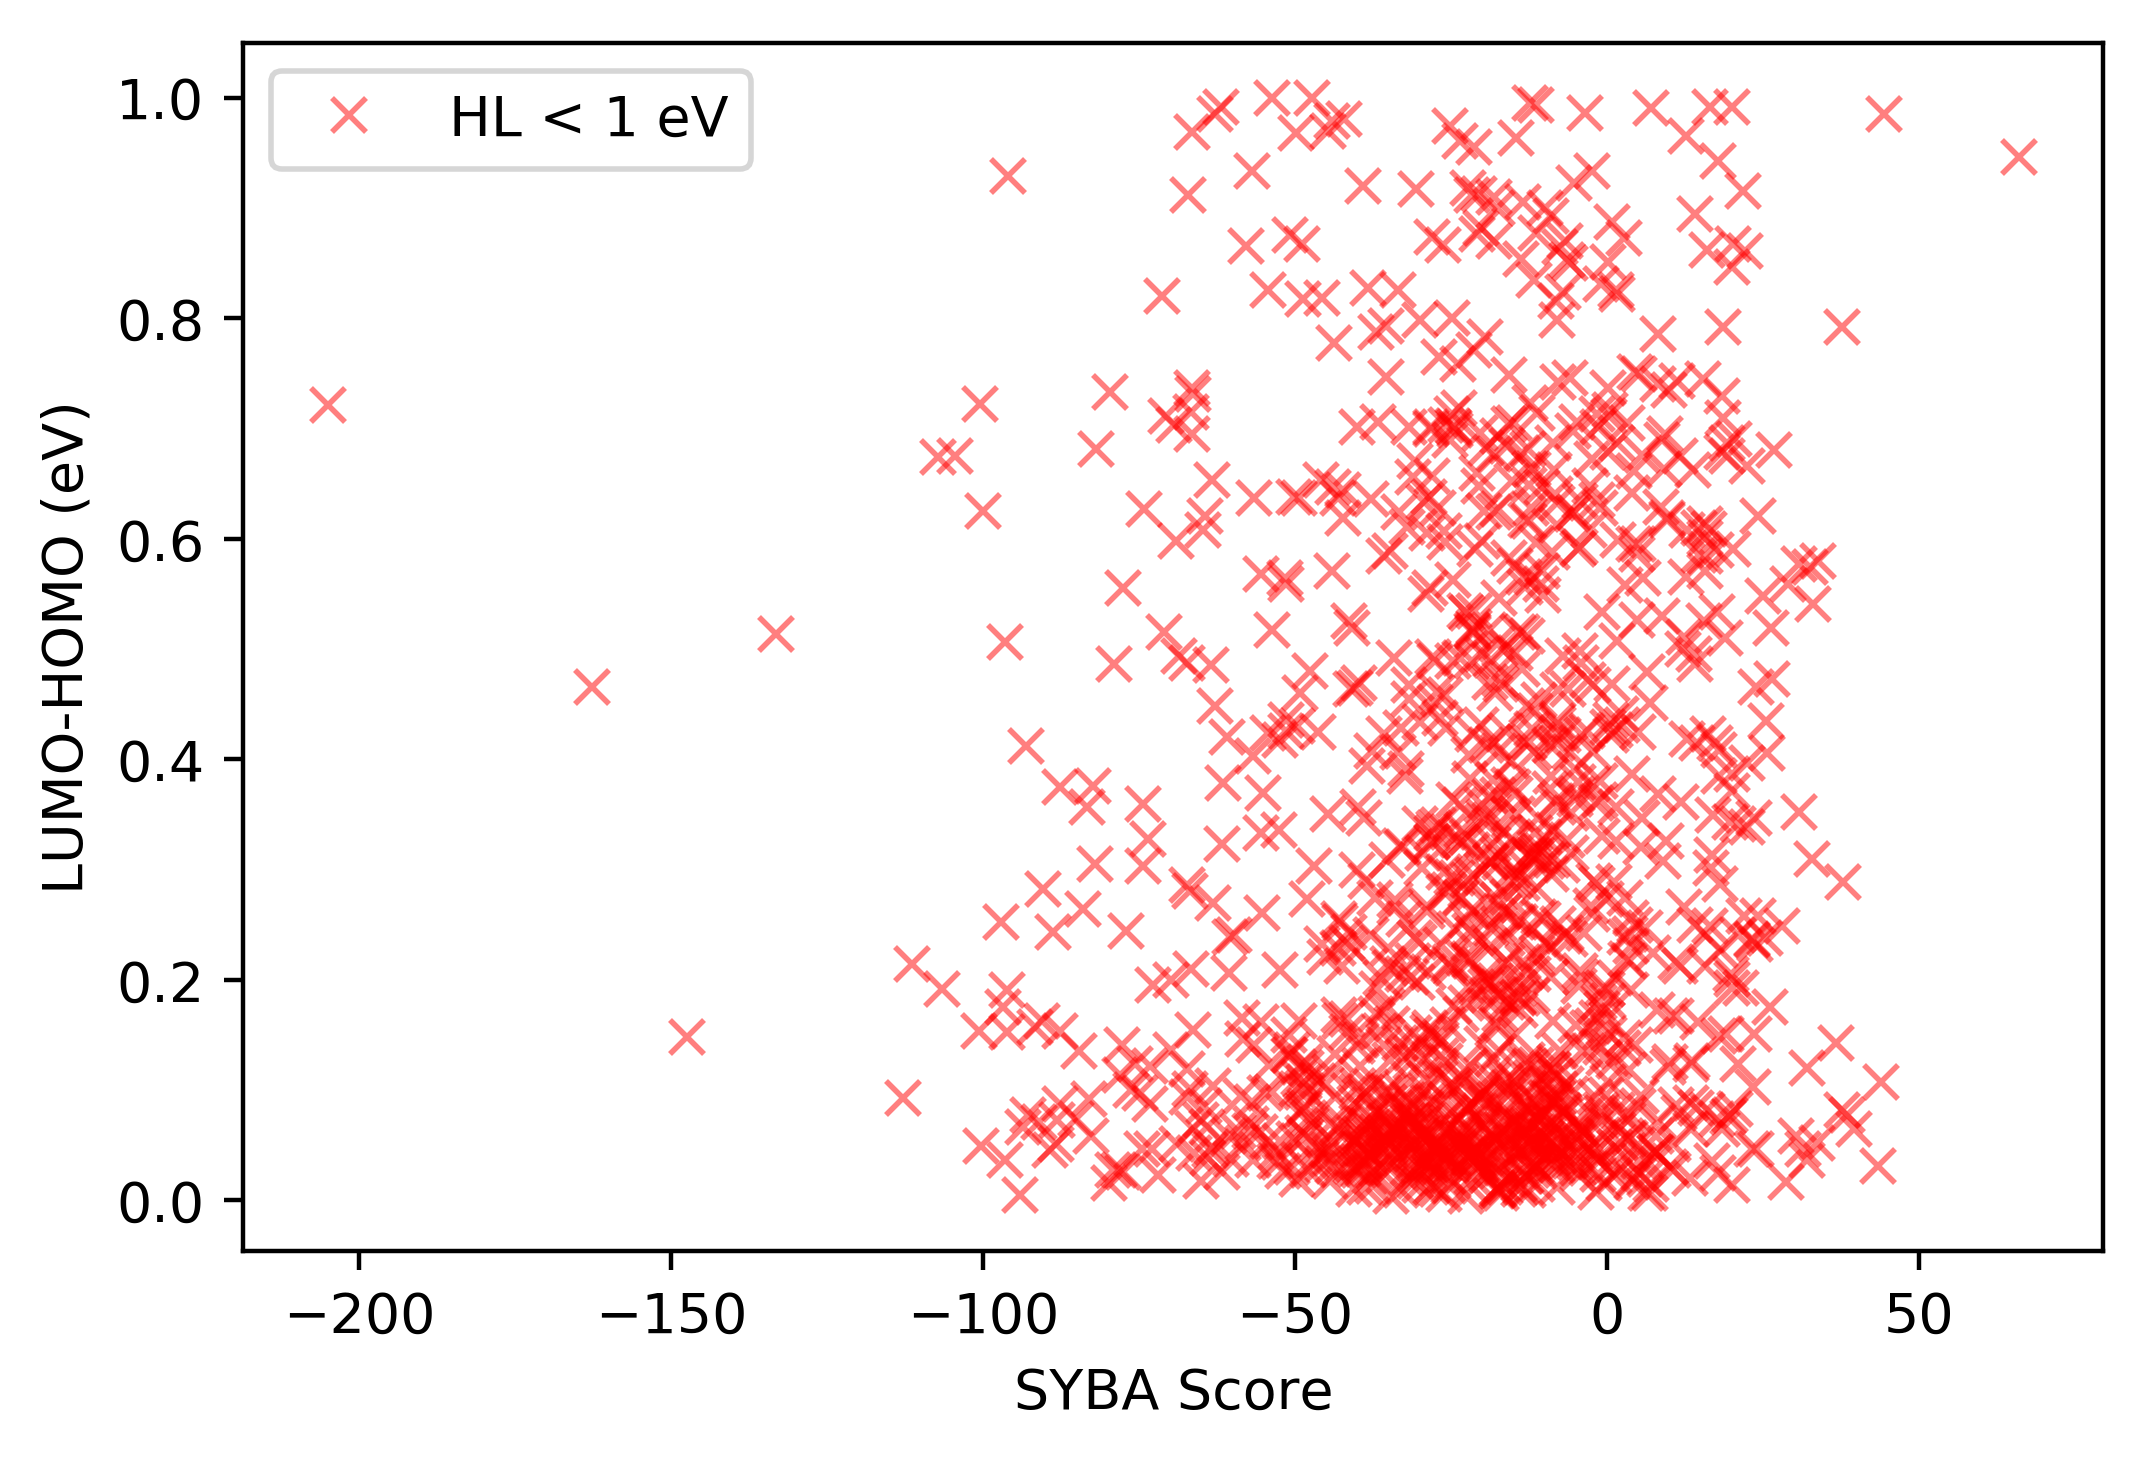

In [20]:
plt.plot(HL_lt_1_SYBA_score,HL_lt_1,linestyle='none',marker='x',alpha=0.5,label='HL < 1 eV',color='r')
plt.legend()
plt.ylabel('LUMO-HOMO (eV)')
plt.xlabel('SYBA Score')
plt.show()

In [21]:
# Parameters
ntraj=len(df3['SYBA Score'])
n=20
p=0.4

colors = plt.cm.jet(np.linspace(0,1,ntraj))# Initialize holder for trajectories

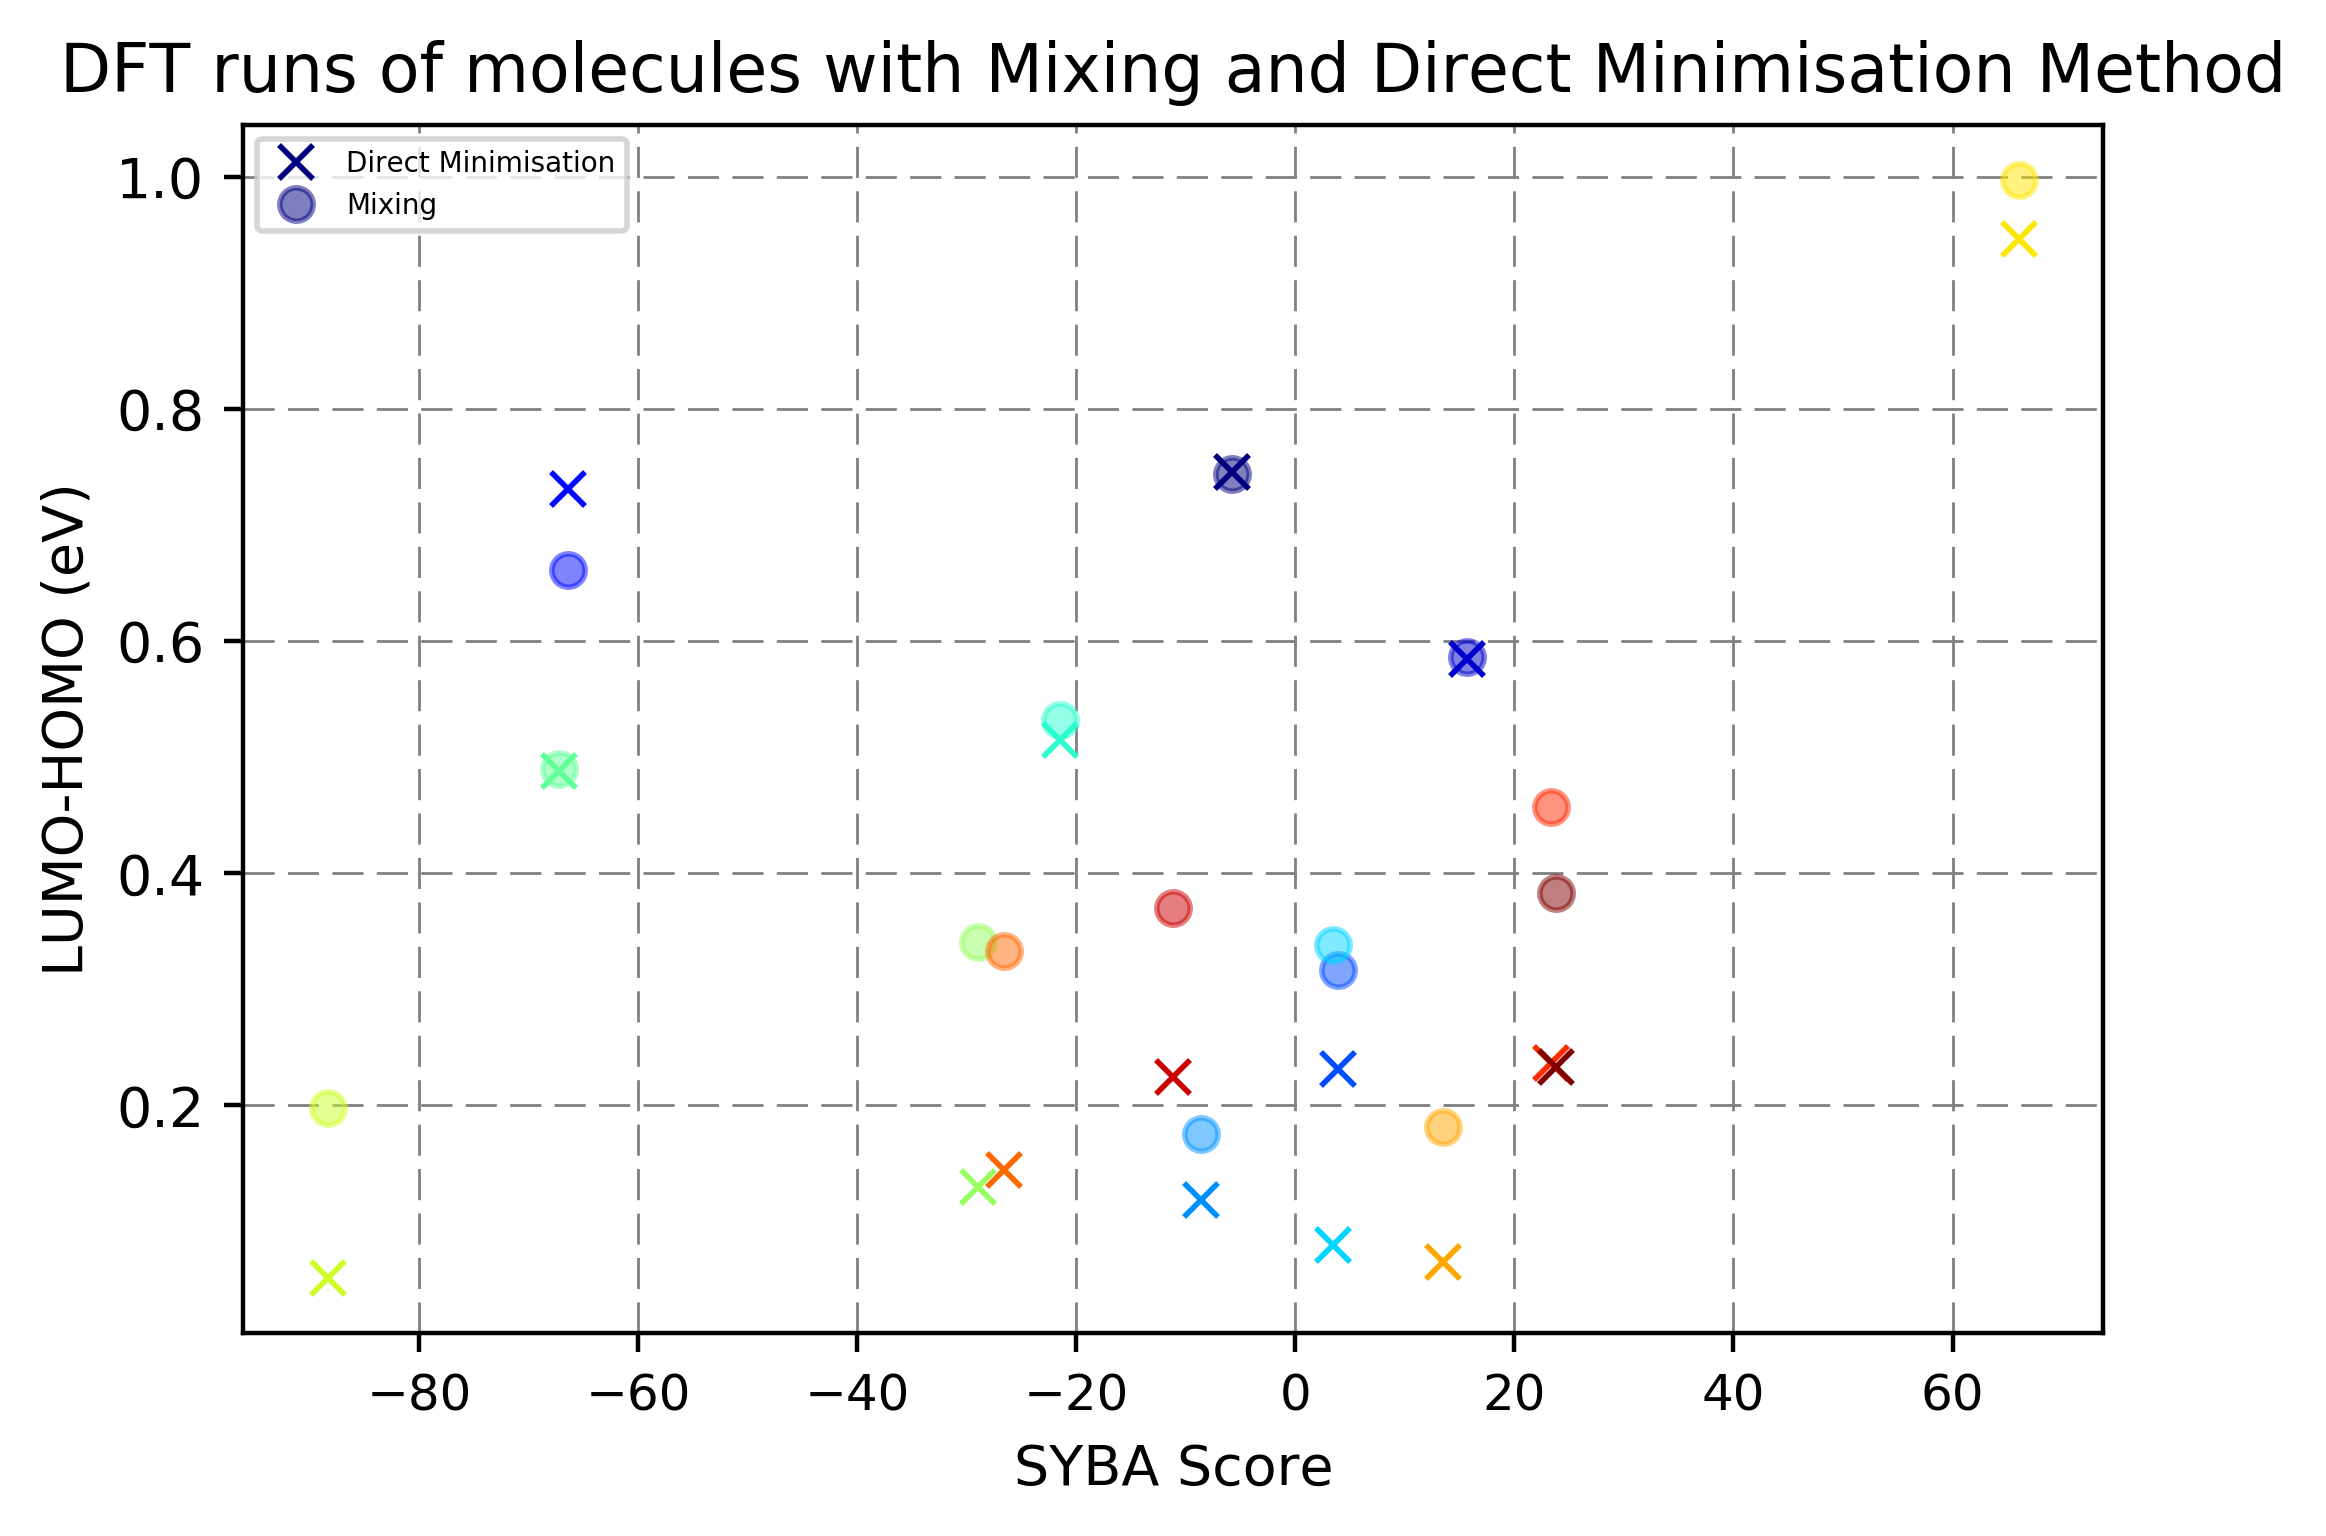

In [84]:
plt.figure(figsize=(6,4))
for i,score in enumerate(df3['SYBA Score']):
#     print i,score, df3['LUMO-HOMO_x'][i], df3['LUMO-HOMO_y'][i]
#     plt.plot(score,df3['LUMO-HOMO_x'][i],linestyle='none',marker='x',alpha=1,label='Direct Minimisation',color='b')#,color = colors[i])
#     plt.plot(score,df3['LUMO-HOMO_y'][i],linestyle='none',marker='o',alpha=0.5,label='Mixing',color='g')#,color = colors[i])
    plt.plot(score,df3['LUMO-HOMO_x'][i],linestyle='none',marker='x',alpha=1,label='Direct Minimisation',color = colors[i])
    plt.plot(score,df3['LUMO-HOMO_y'][i],linestyle='none',marker='o',alpha=0.5,label='Mixing',color = colors[i])
plt.xlabel('SYBA Score')
plt.ylabel('LUMO-HOMO (eV)')
plt.legend(['Direct Minimisation','Mixing'],loc=2,prop={'size':5})
plt.title("DFT runs of molecules with Mixing and Direct Minimisation Method")
plt.grid(True, color = "grey", linewidth = ".5", linestyle = "--")
plt.show()

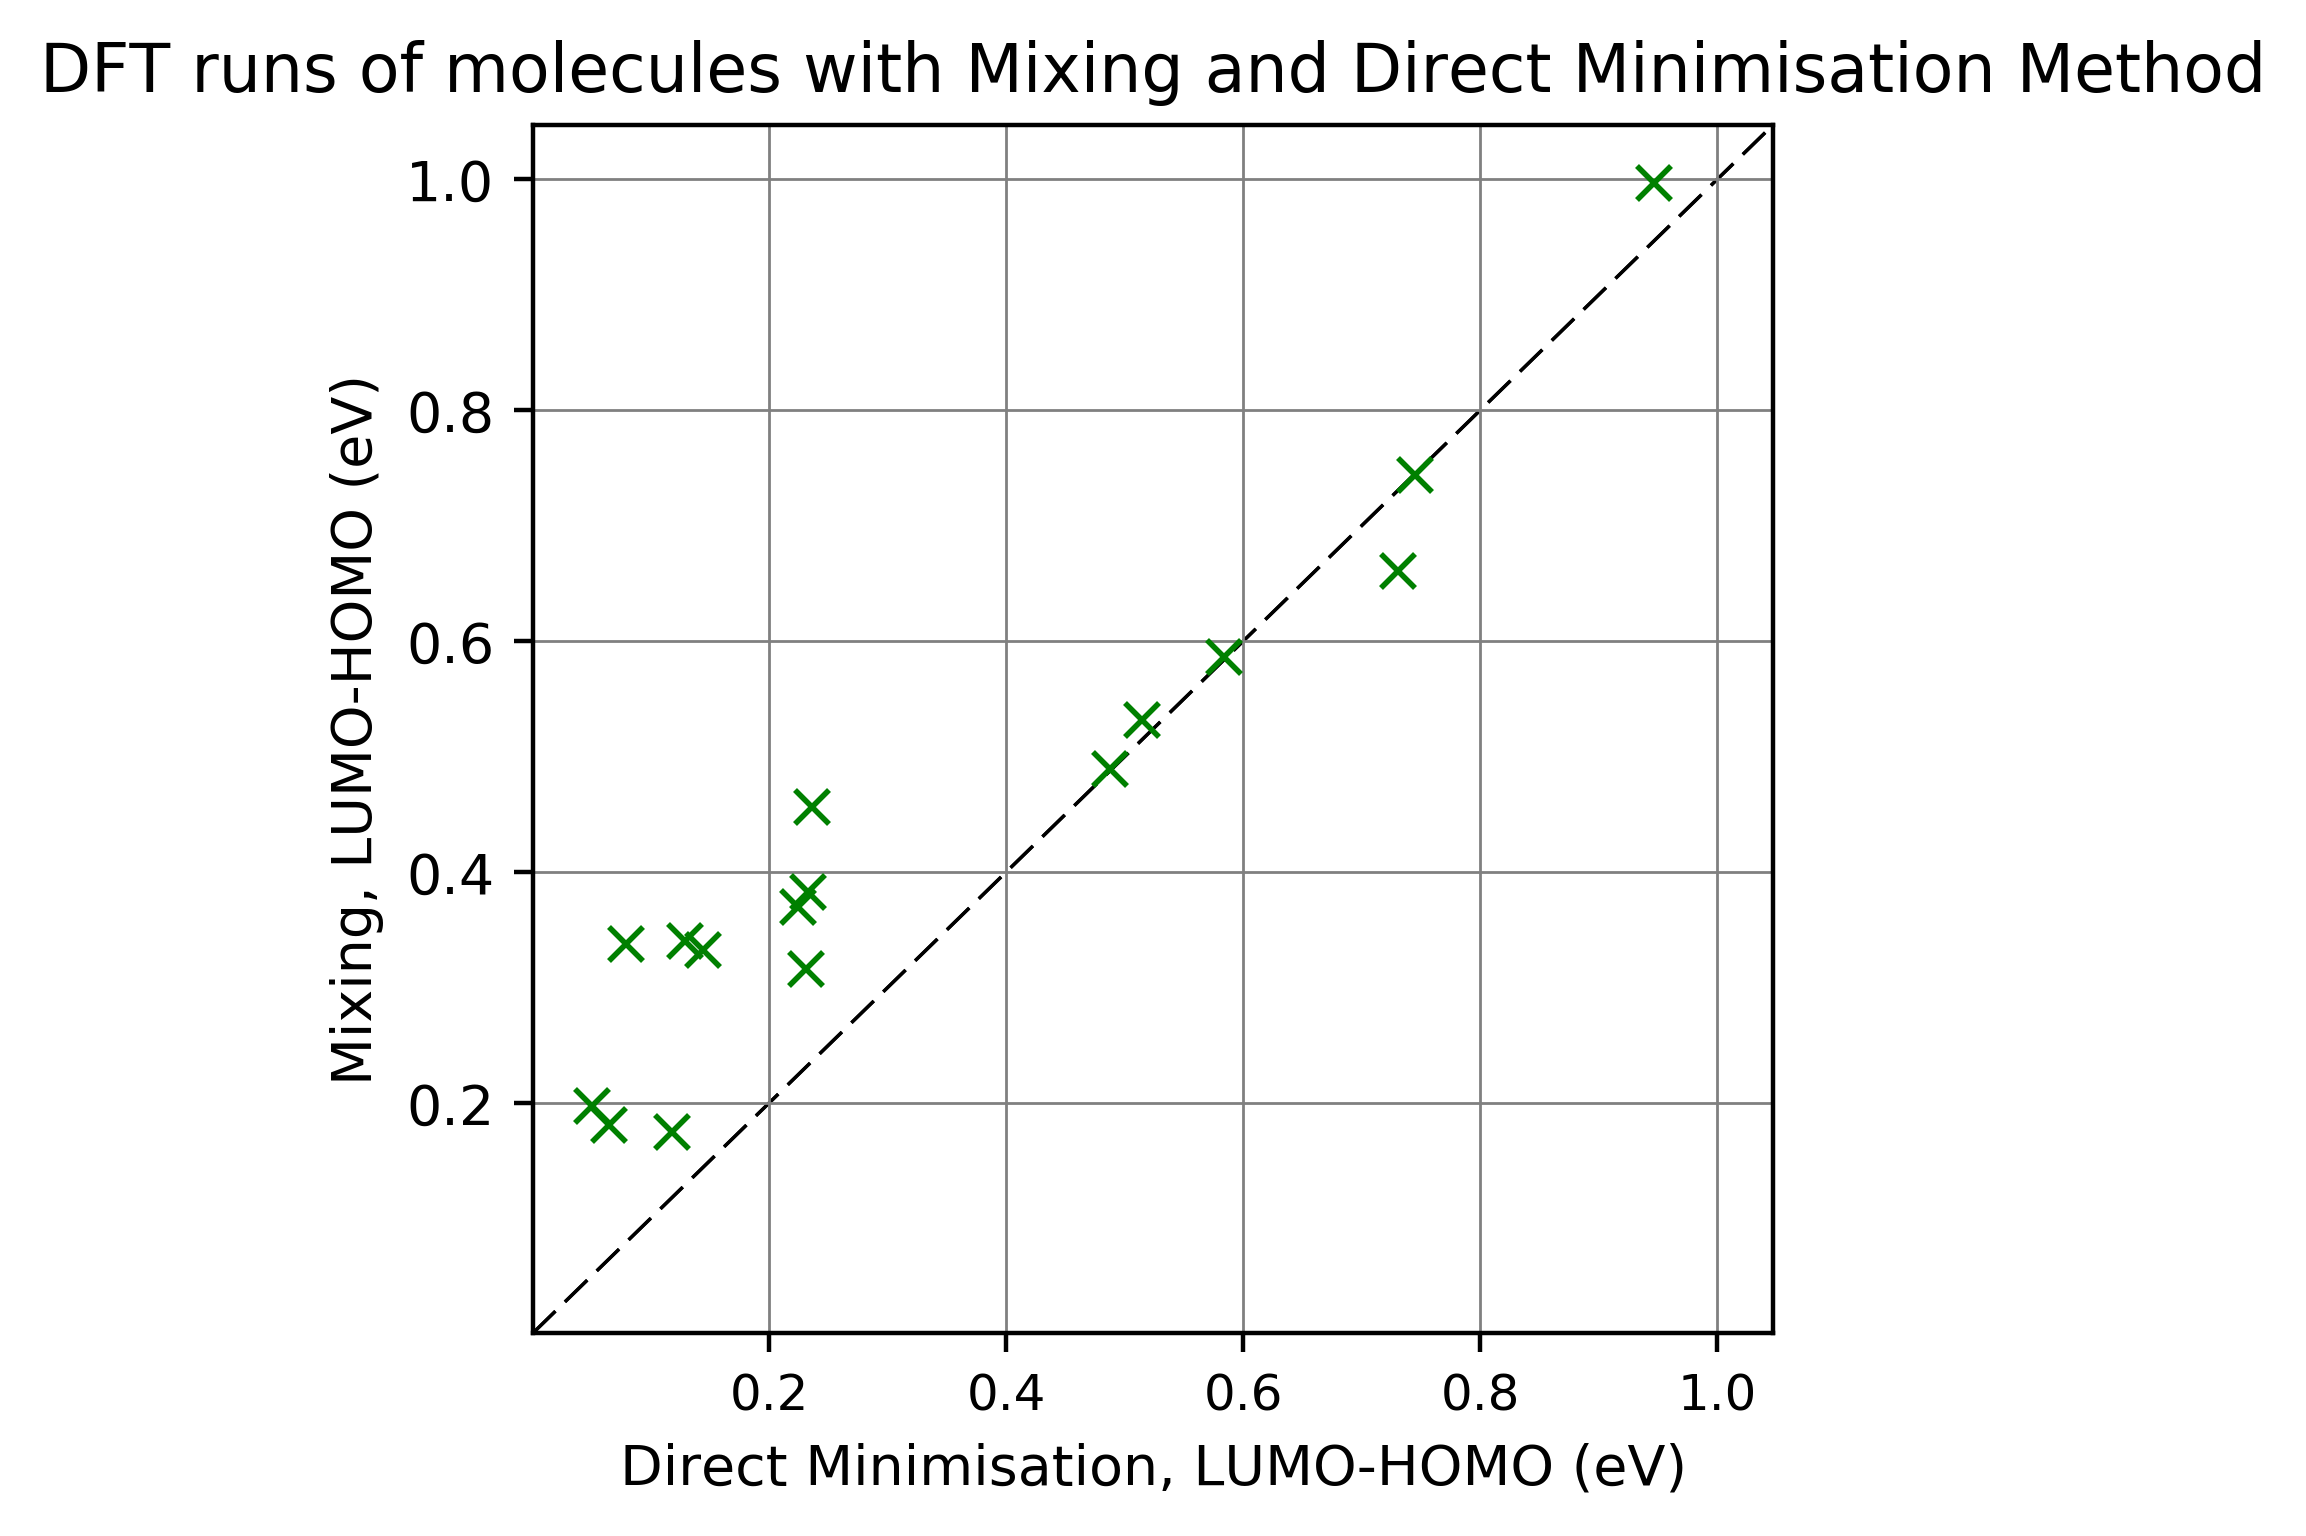

In [92]:
plt.figure(figsize=(4,4))
for i,score in enumerate(df3['SYBA Score']):
#     print i,score, df3['LUMO-HOMO_x'][i], df3['LUMO-HOMO_y'][i]
    plt.plot(df3['LUMO-HOMO_x'][i],df3['LUMO-HOMO_y'][i],linestyle='none',marker='x',label='Direct Minimisation',color='g')#color = colors[i-1])
plt.xlabel('Direct Minimisation, LUMO-HOMO (eV)')
plt.ylabel('Mixing, LUMO-HOMO (eV)')
# plt.legend(['Direct Minimisation','Mixing'],loc=2,prop={'size':5})

x_min = min([min(list(df3['LUMO-HOMO_x'].values)),min(list(df3['LUMO-HOMO_y'].values))])-0.05
x_max = max([max(list(df3['LUMO-HOMO_x'].values)),max(list(df3['LUMO-HOMO_y'].values))])+0.05

y_min = x_min
y_max = x_max

lims = [[x_min,y_min],[x_max,y_max]]

plt.plot(lims, lims, 'k--', alpha=1,zorder=0,linewidth=0.6)

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

plt.title("DFT runs of molecules with Mixing and Direct Minimisation Method")
plt.show()

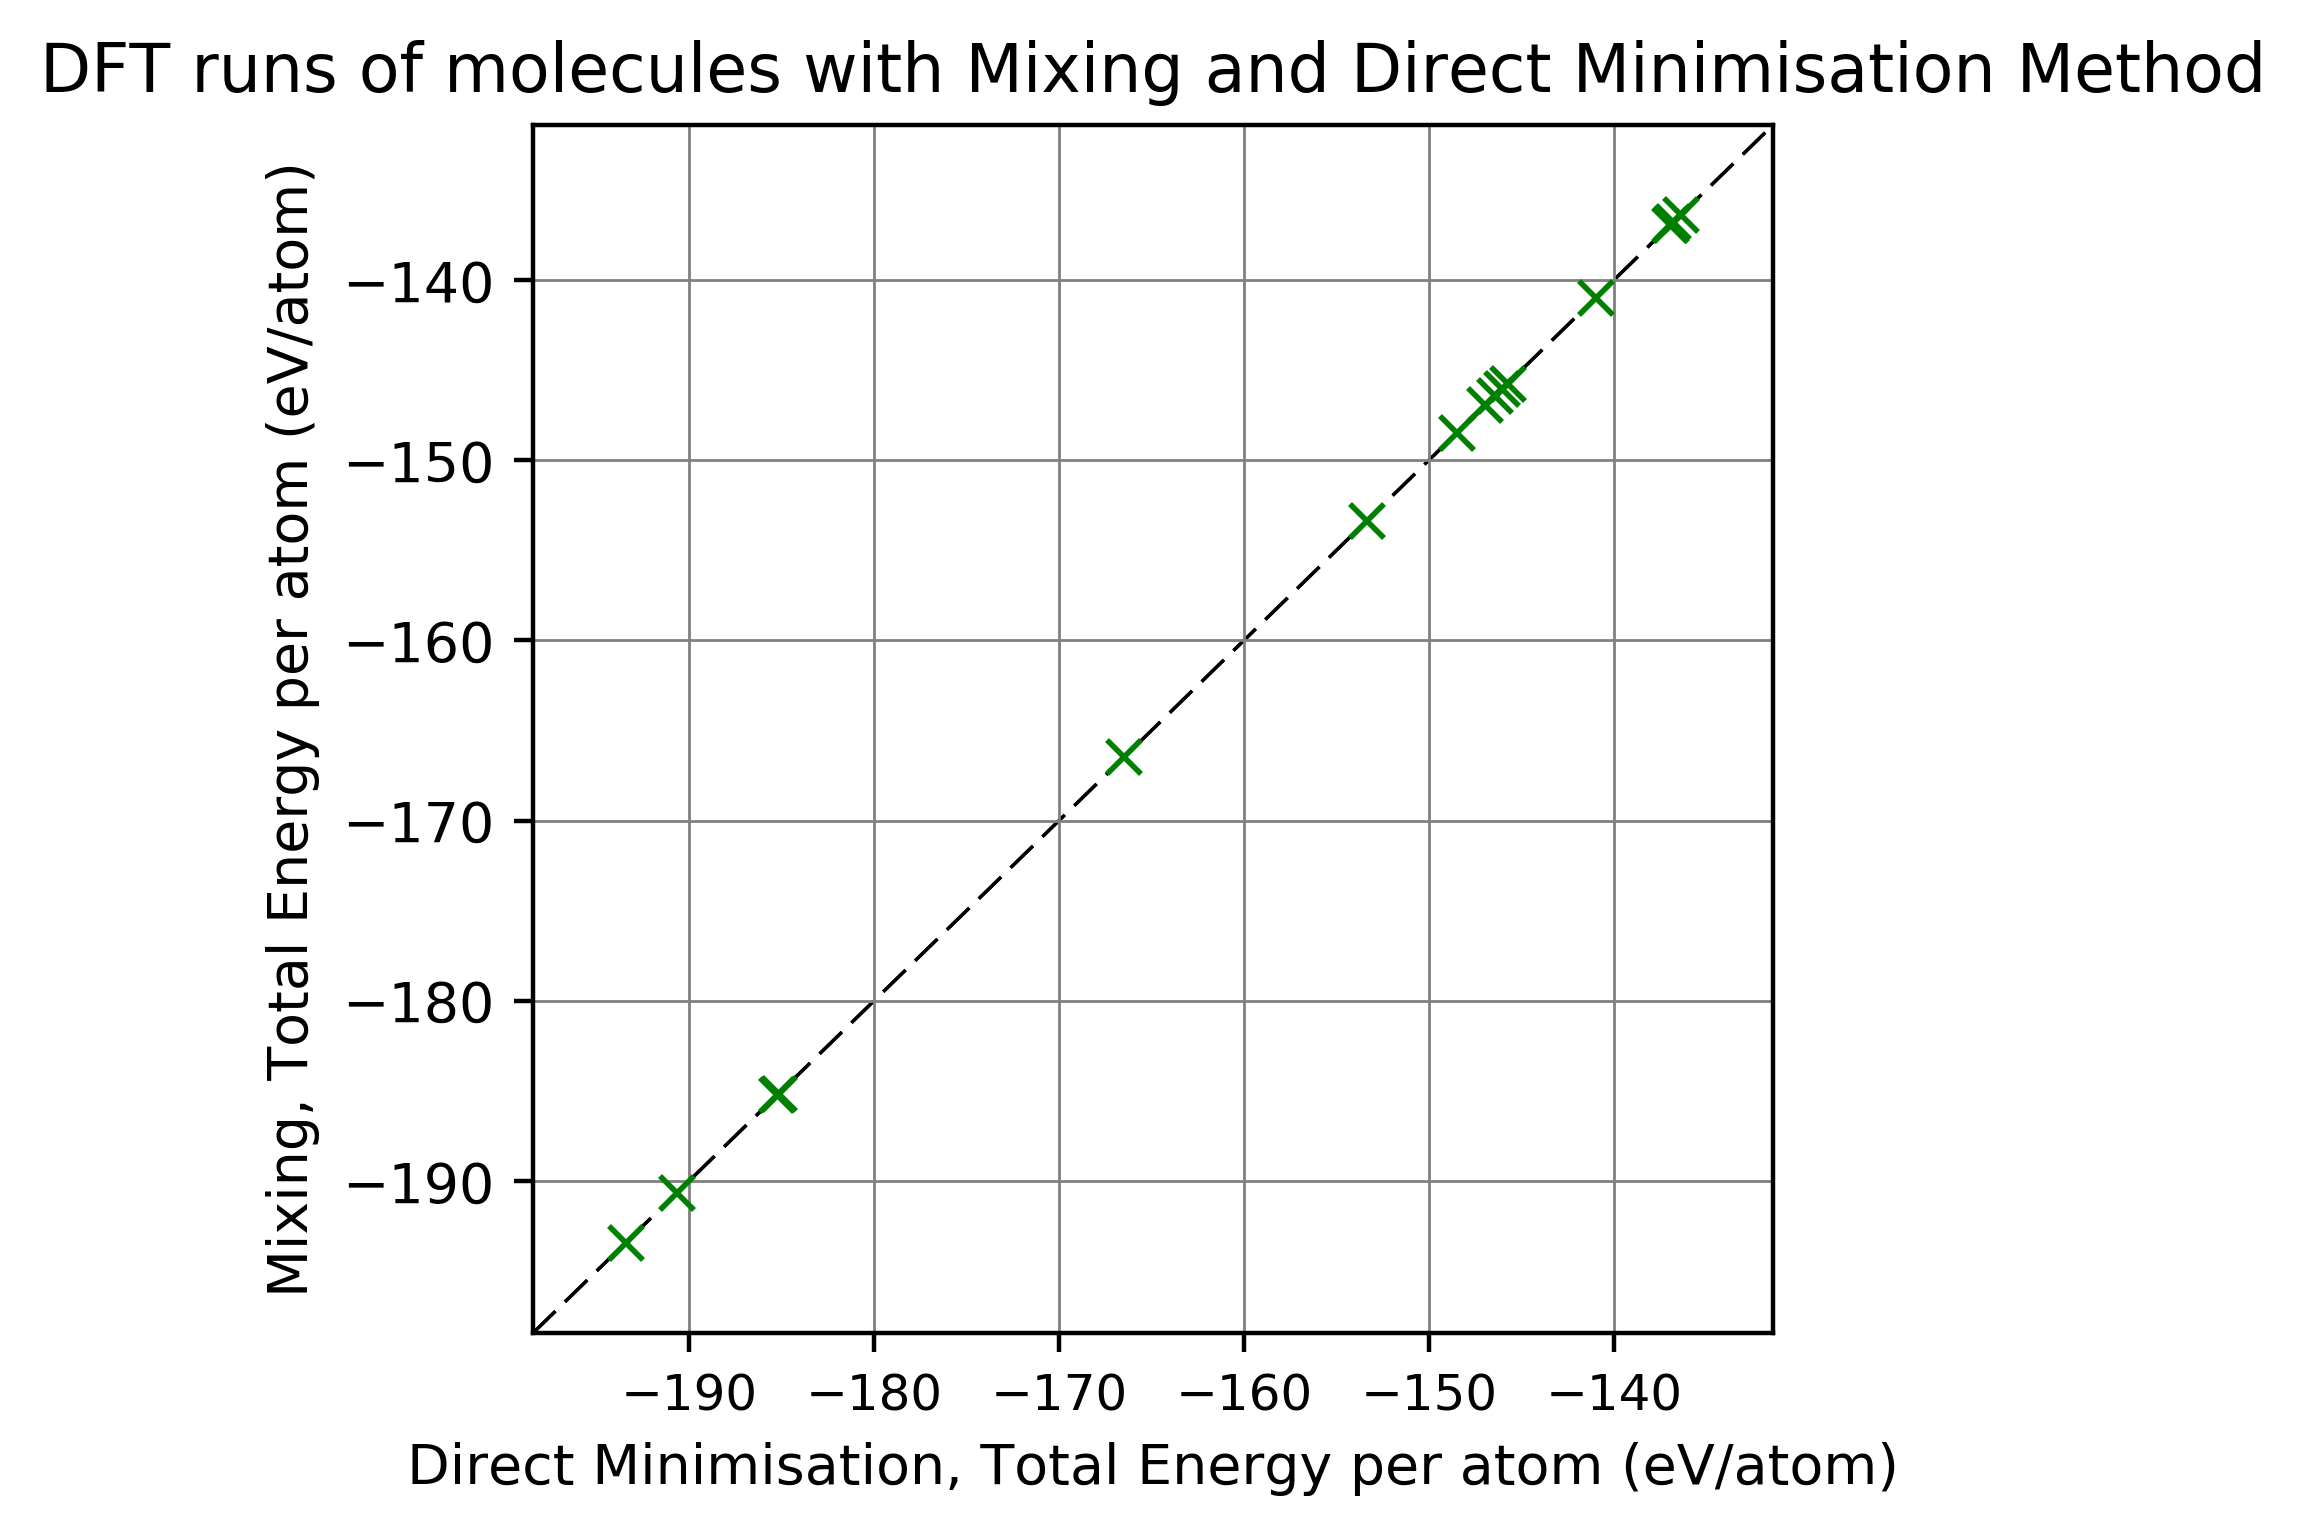

In [94]:
plt.figure(figsize=(4,4))

for i,score in enumerate(df3['SYBA Score']):
#     print i,score, df3['LUMO-HOMO_x'][i], df3['LUMO-HOMO_y'][i]
    plt.plot(df3['Total Energy per atom (eV/atom)_x'][i],df3['Total Energy per atom (eV/atom)_y'][i],linestyle='none',marker='x',label='Direct Minimisation',color='g')#color = colors[i-1])
plt.xlabel('Direct Minimisation, Total Energy per atom (eV/atom)')
plt.ylabel('Mixing, Total Energy per atom (eV/atom)')
# plt.legend(['Direct Minimisation','Mixing'],loc=2,prop={'size':5})
plt.title("DFT runs of molecules with Mixing and Direct Minimisation Method")

x_min = min([min(list(df3['Total Energy per atom (eV/atom)_x'].values)),min(list(df3['Total Energy per atom (eV/atom)_x'].values))])-5
x_max = max([max(list(df3['Total Energy per atom (eV/atom)_y'].values)),max(list(df3['Total Energy per atom (eV/atom)_y'].values))])+5

y_min = x_min
y_max = x_max

lims = [[x_min,y_min],[x_max,y_max]]

plt.plot(lims, lims, 'k--', alpha=1,zorder=0,linewidth=0.6)

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

plt.show()

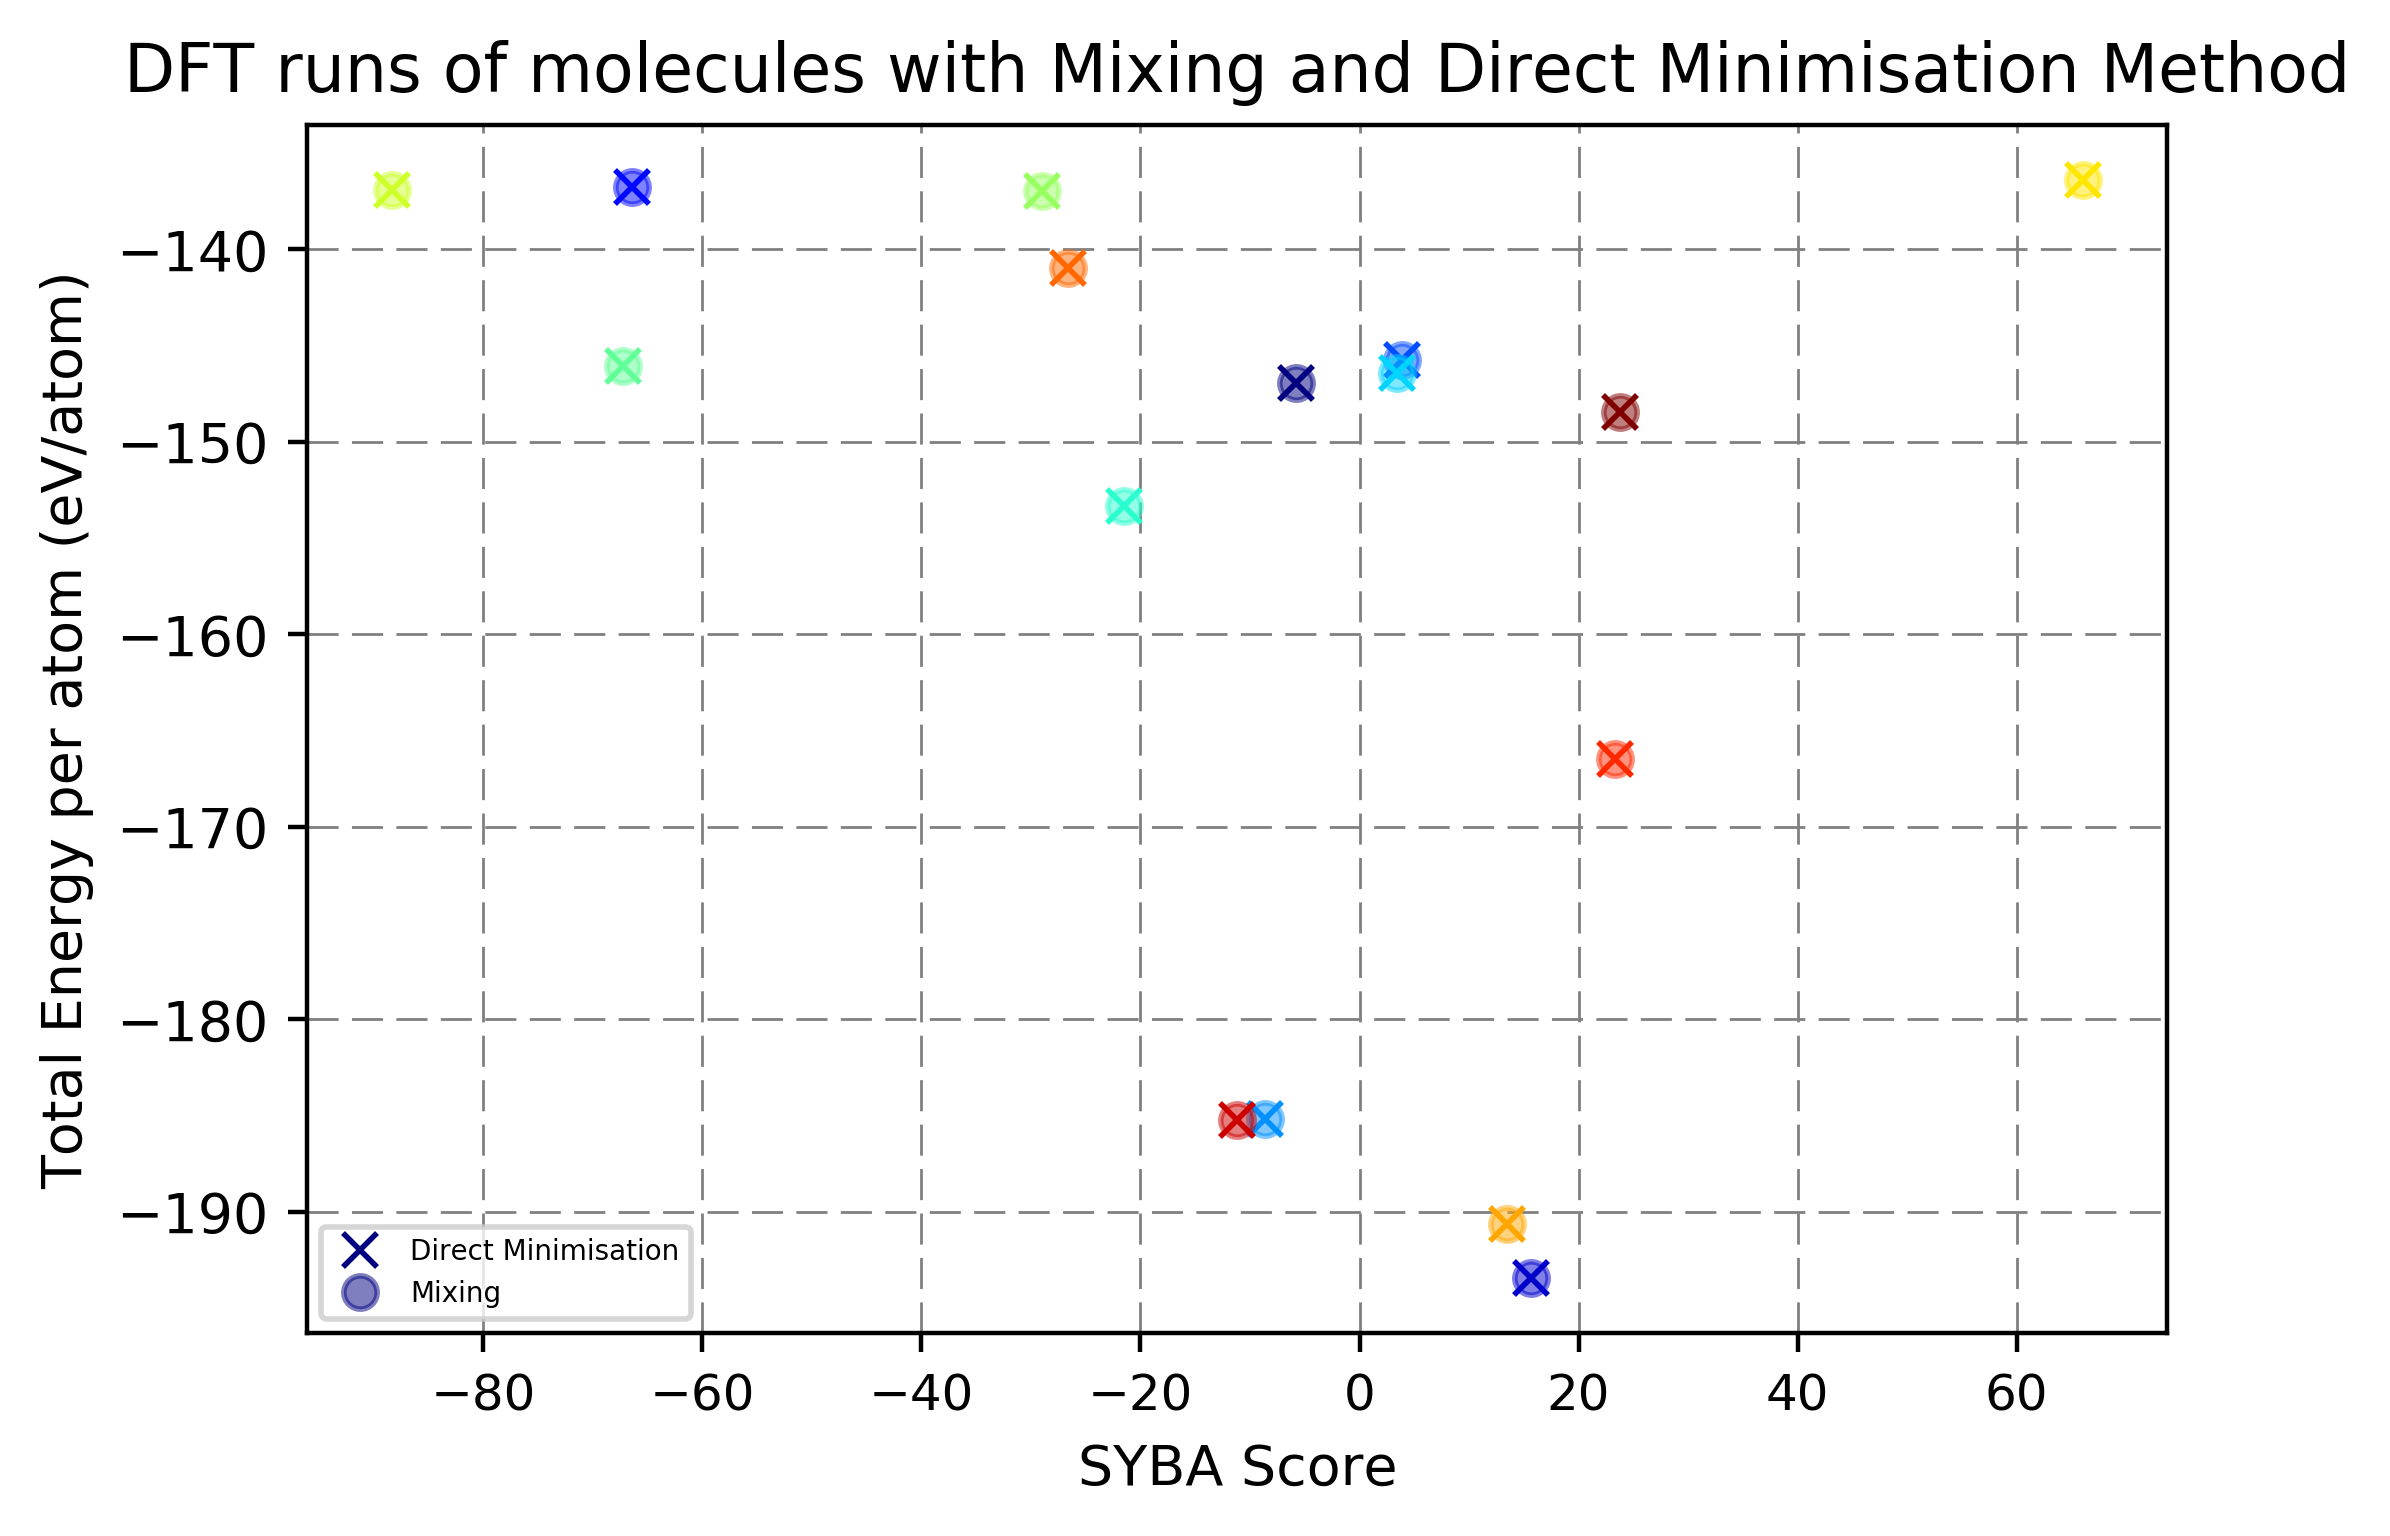

In [86]:
for i,score in enumerate(df3['SYBA Score']):
#     print i,score, df3['LUMO-HOMO_x'][i], df3['LUMO-HOMO_y'][i]
#     plt.plot(score,df3['Total Energy per atom (eV/atom)_x'][i],linestyle='none',marker='x',alpha=1,label='Direct Minimisation',color='b')#,color = colors[i])
#     plt.plot(score,df3['Total Energy per atom (eV/atom)_y'][i],linestyle='none',marker='o',alpha=0.5,label='Mixing',color='g')#,color = colors[i])
    plt.plot(score,df3['Total Energy per atom (eV/atom)_x'][i],linestyle='none',marker='x',alpha=1,label='Direct Minimisation',color = colors[i])
    plt.plot(score,df3['Total Energy per atom (eV/atom)_y'][i],linestyle='none',marker='o',alpha=0.5,label='Mixing',color = colors[i])
plt.xlabel('SYBA Score')
plt.ylabel('Total Energy per atom (eV/atom)')
plt.legend(['Direct Minimisation','Mixing'],loc=3,prop={'size':5})
plt.title("DFT runs of molecules with Mixing and Direct Minimisation Method")
plt.grid(True, color = "grey", linewidth = ".5", linestyle = "--")
plt.show()

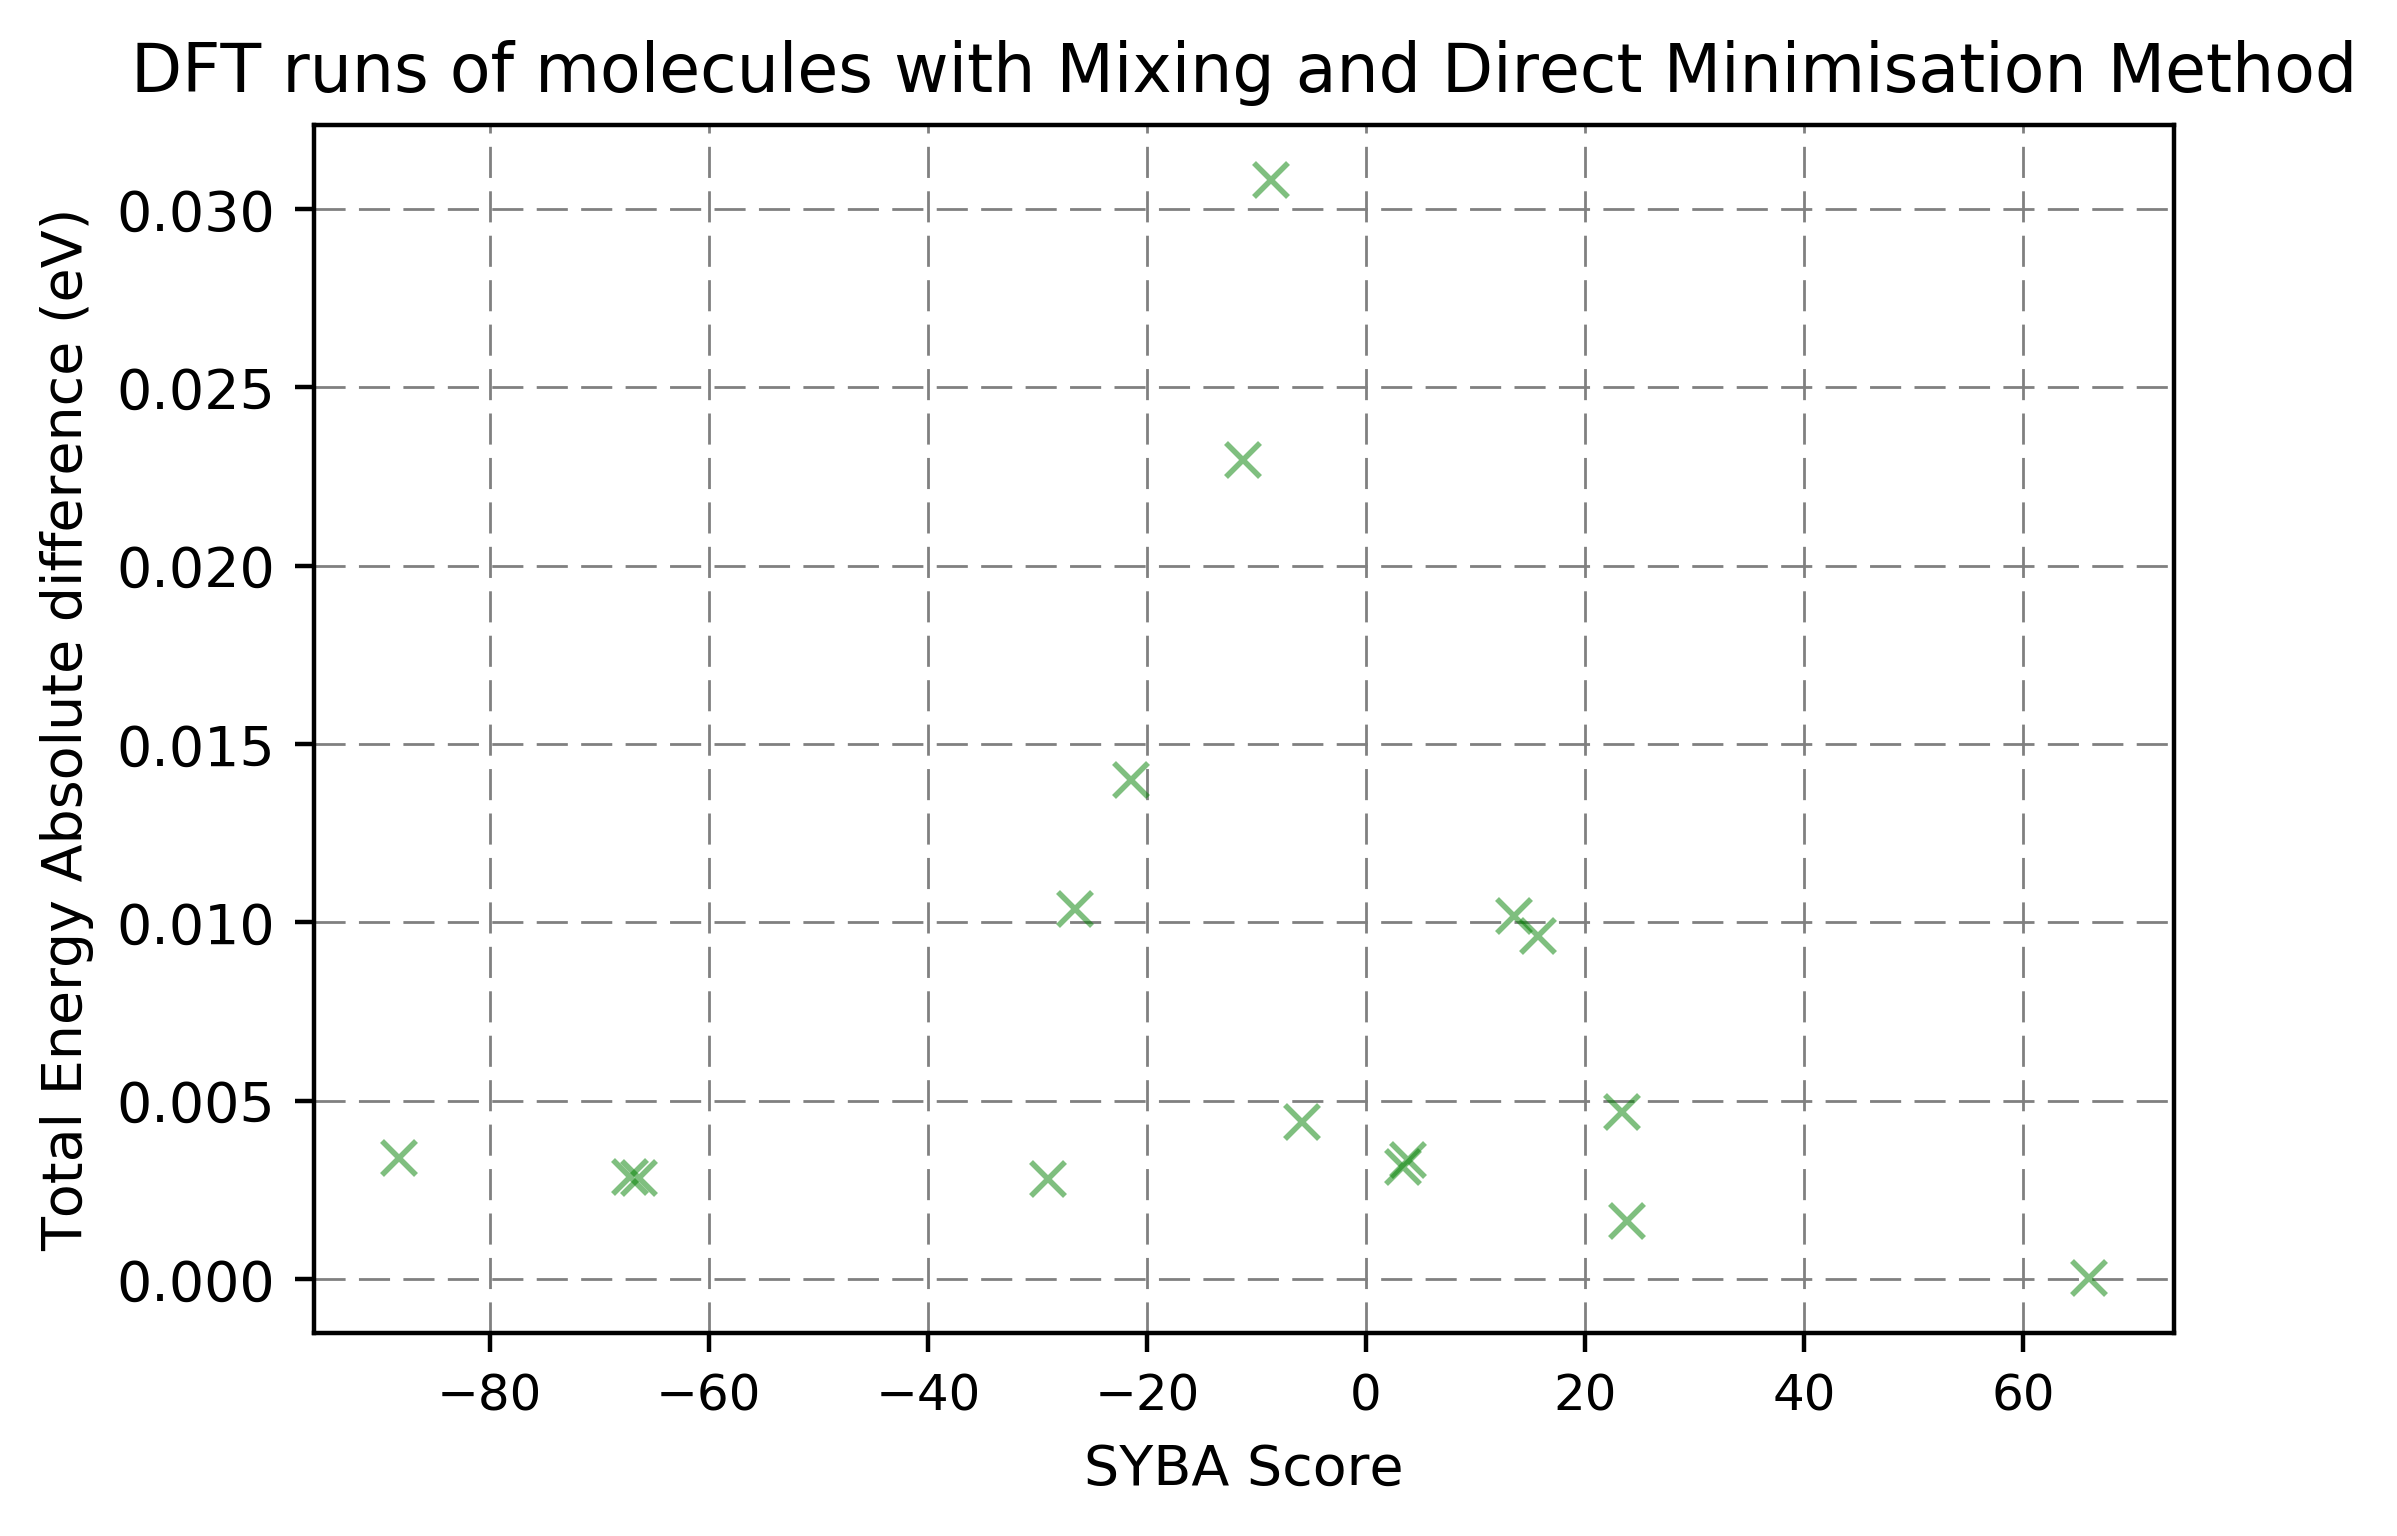

In [80]:
for i,score in enumerate(df3['SYBA Score']):
    plt.plot(score,abs(df3['Total Energy per atom (eV/atom)_y'][i]-df3['Total Energy per atom (eV/atom)_x'][i]),linestyle='none',marker='x',alpha=0.5,label='Mixing',color = 'g')
plt.xlabel('SYBA Score')
plt.ylabel('Total Energy Absolute difference (eV)')
# plt.legend(['Direct Minimisation','Mixing'],loc=1,prop={'size':5})
plt.title("DFT runs of molecules with Mixing and Direct Minimisation Method")
plt.grid(True, color = "grey", linewidth = ".5", linestyle = "--")
plt.show()

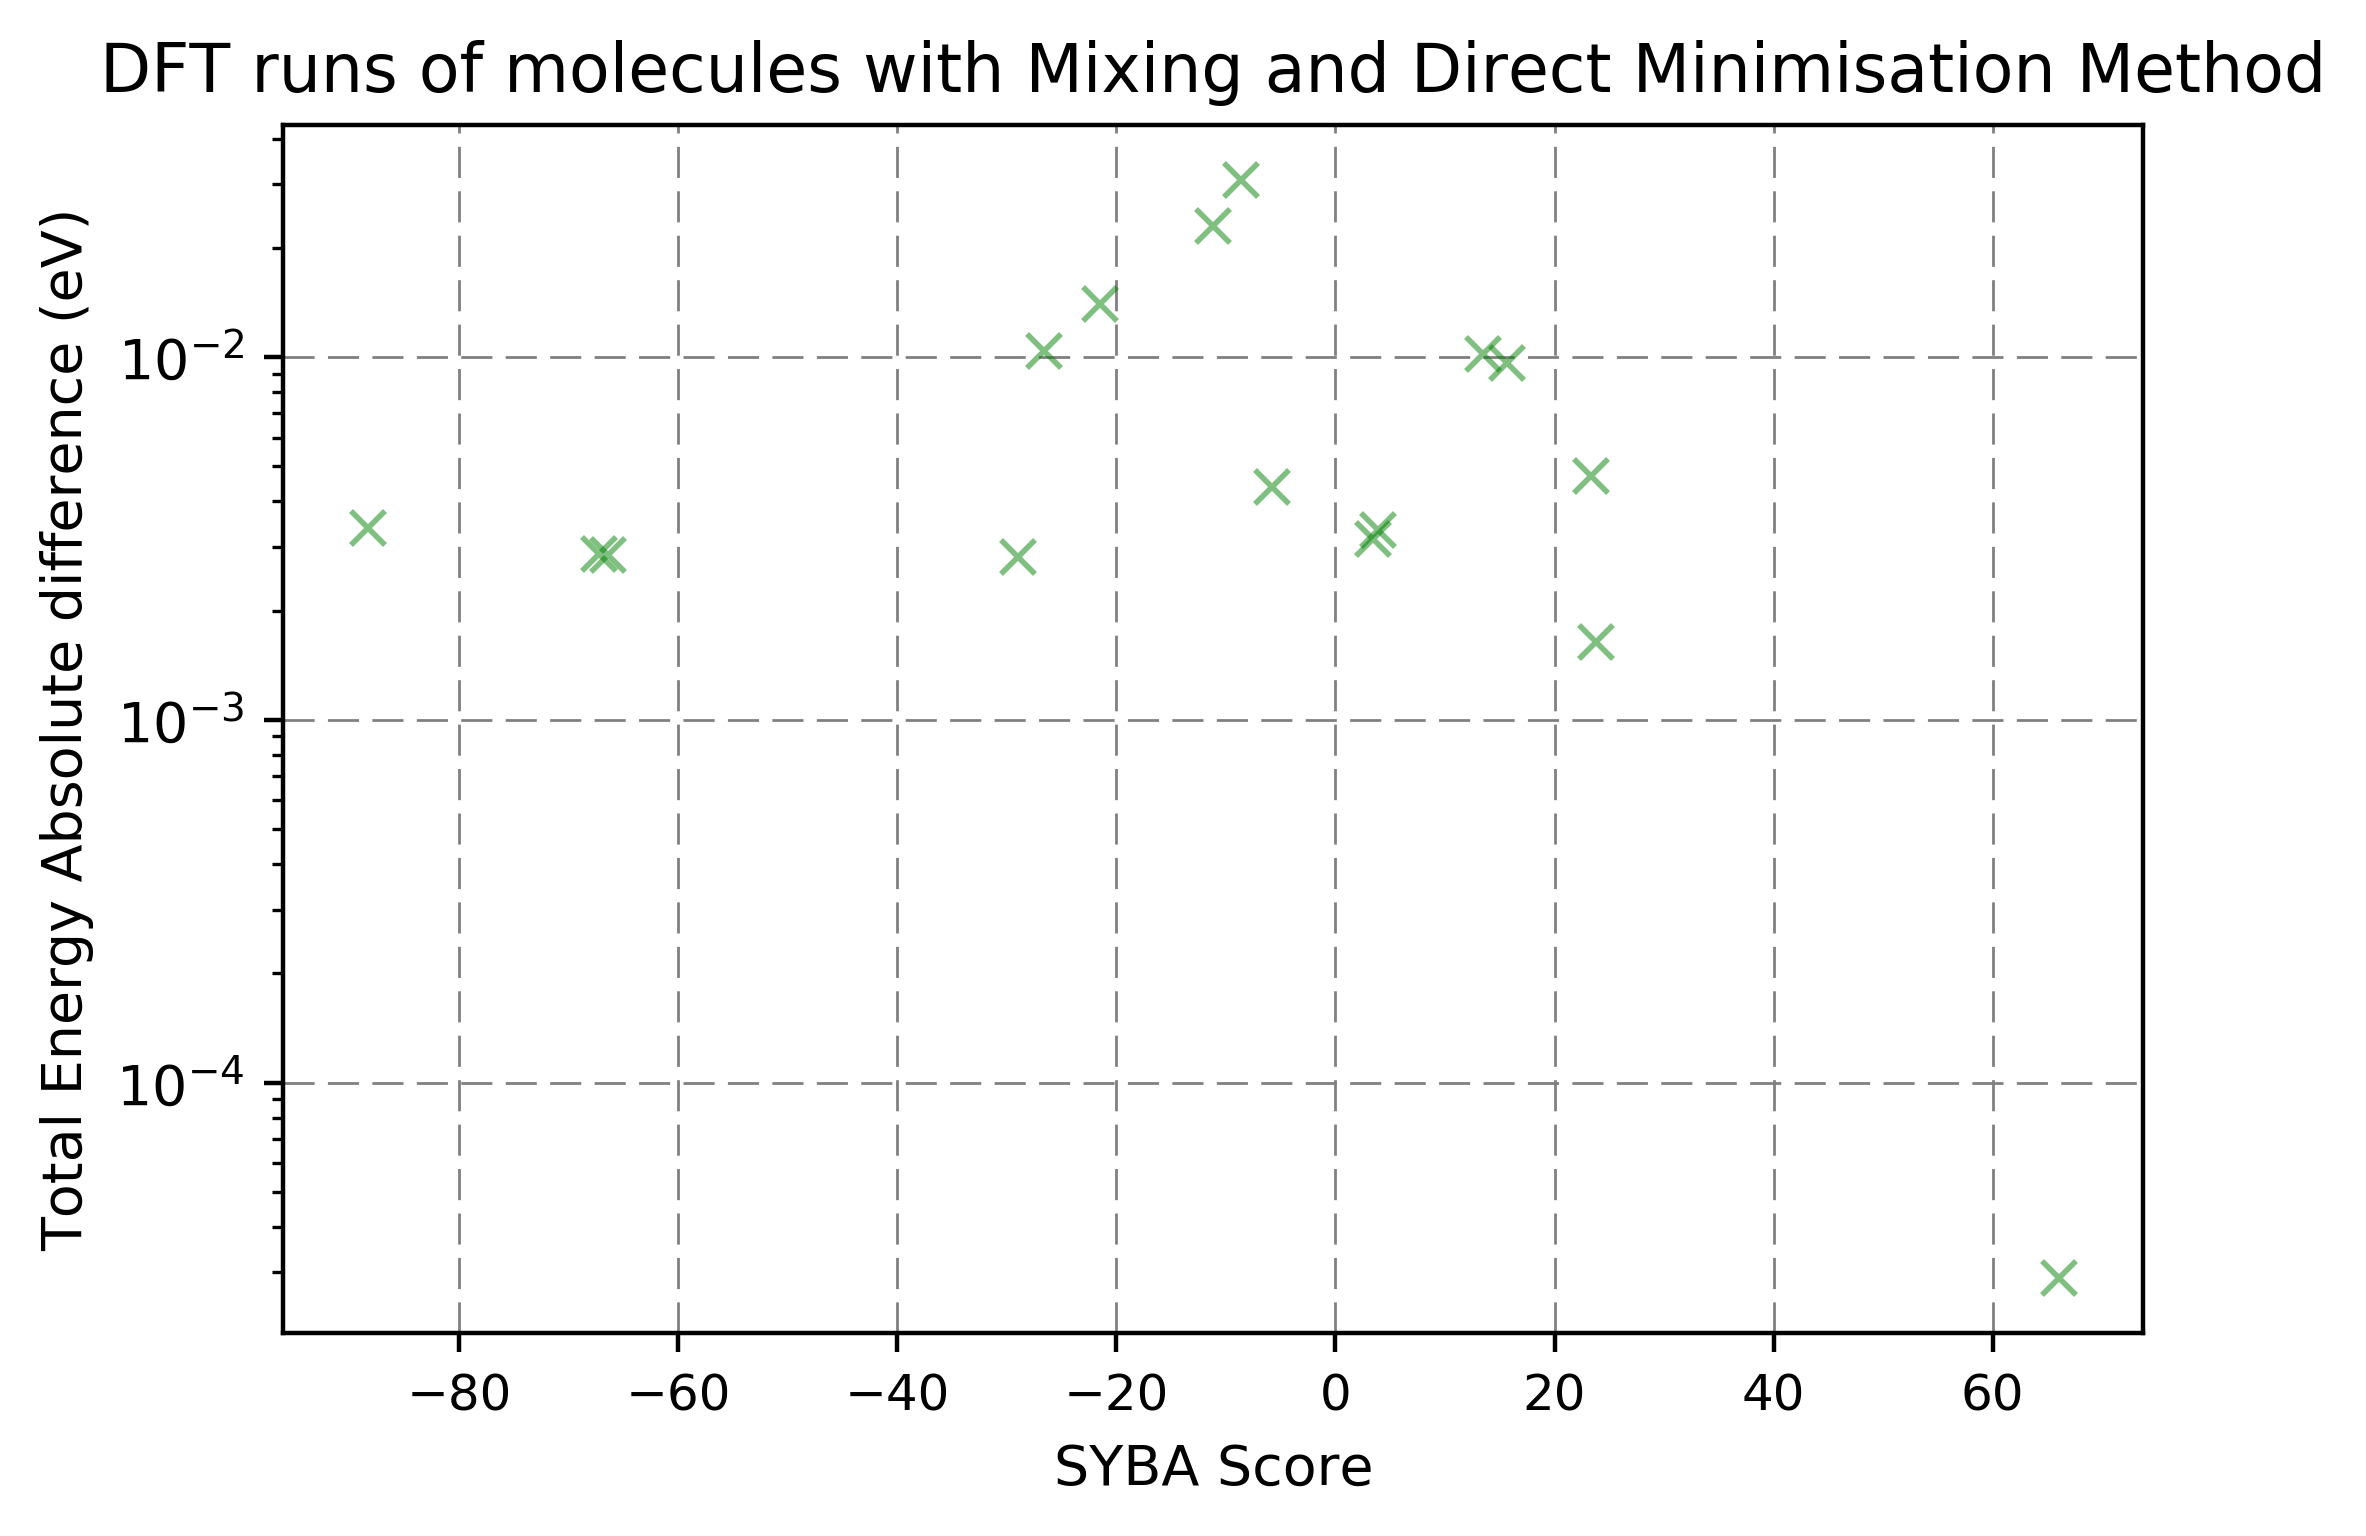

In [81]:
for i,score in enumerate(df3['SYBA Score']):
    plt.plot(score,abs(df3['Total Energy per atom (eV/atom)_y'][i]-df3['Total Energy per atom (eV/atom)_x'][i]),linestyle='none',marker='x',alpha=0.5,label='Mixing',color = 'g')
plt.xlabel('SYBA Score')
plt.ylabel('Total Energy Absolute difference (eV)')
# plt.legend(['Direct Minimisation','Mixing'],loc=1,prop={'size':5})
plt.title("DFT runs of molecules with Mixing and Direct Minimisation Method")
plt.yscale('log')
plt.grid(True, color = "grey", linewidth = ".5", linestyle = "--")
plt.show()

In [31]:
assert false

NameError: name 'false' is not defined

# Forces

In [ ]:
fig, ax = plt.subplots()
ax.scatter(syba_sc_list,HL_list, alpha=0.7)
ax.scatter(og_mol_score,og_HL, alpha=0.7)
plt.ylabel('LUMO-HOMO (eV)')
plt.xlabel('SYBA score')
plt.show()

In [ ]:
fig, ax = plt.subplots()
for file in data.iterkeys():
    score = data[file]['score']
    H_L = data[file]['force']
    ax.scatter(score,H_L)

plt.ylabel('Force Norm (Hartree/Bohr)')
plt.xlabel('SYBA score')
plt.show()